# ETUDE DE MARCHE : LA POULE QUI CHANTE

# Analyse exploratoire des données

## Sommaire du notebook

1. **Import et sélection des données**

2. **Fusion des données pour tableau final d'étude**

3. **Etude des variables**    
- 3.1 Population en 2018 (en M)
- 3.2 Importations et production de produits issus de la volaille (kT)
- 3.3 Production 2021 de viande de poulet (kT)
- 3.4 Evolution 2018-2020 de la consommation de produits de volaille (%)
- 3.5 PIB 2021 par habitants (dollars)
- 3.6 Indice de stabilité politique

4. **Analyse en composantes principales**

5. **Explication de la variance et éboulis des valeurs propres**

6. **Détail des composantes principales**

7. **Cercle des corrélations**

8. **Projection des individus**


In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

***

# 1. IMPORT ET SELECTION DES DONNEES PERTINENTES

## Population

In [2]:
# Aperçu des données

pop = pd.read_csv('Population_2000_2018.csv')
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [3]:
# valeurs nulles et types des variables

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [4]:
# Aperçu global des données

pop.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [5]:
# Vérification des composantes des différentes variables

pop['Code Domaine'].unique()

array(['OA'], dtype=object)

In [6]:
pop['Domaine'].unique()

array(['Séries temporelles annuelles'], dtype=object)

In [7]:
pop['Produit'].unique()

array(['Population-Estimations'], dtype=object)

In [8]:
pop['Symbole'].unique()

array(['X', 'A'], dtype=object)

In [9]:
pop['Description du Symbole'].value_counts()

Sources internationales sûres                                                             4374
Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées      37
Name: Description du Symbole, dtype: int64

In [10]:
pop['Note'].value_counts()

UNDESA, Population Division – World Population Prospects, the 2017 Revision    258
Name: Note, dtype: int64

In [11]:
# Sélection des colonnes utiles pour tableau final

pop = pop[['Zone', 'Année', 'Valeur']]
pop['Valeur'] = round(pop['Valeur']/1000,3)
pop = pop.rename(columns = {'Zone':'Pays','Valeur': 'population (en M)'})
pop

,Pays,Année,population (en M)
0,Afghanistan,2000,20.780
1,Afghanistan,2001,21.607
2,Afghanistan,2002,22.601
3,Afghanistan,2003,23.681
4,Afghanistan,2004,24.727
...,...,...,...
4406,Zimbabwe,2014,13.587
4407,Zimbabwe,2015,13.815
4408,Zimbabwe,2016,14.030
4409,Zimbabwe,2017,14.237


In [12]:
# Sélection données de population 2018

pop2018 = pop.loc[pop['Année'] == 2018]
pop2018 = pop2018.drop(columns = ['Année'])
pop2018 = pop2018.rename(columns = {'population (en M)': 'population 2018 (en M)'})

pop2018

,Pays,population 2018 (en M)
18,Afghanistan,37.172
37,Afrique du Sud,57.793
56,Albanie,2.883
75,Algérie,42.228
94,Allemagne,83.124
...,...,...
4334,Venezuela (République bolivarienne du),28.887
4353,Viet Nam,95.546
4372,Yémen,28.499
4391,Zambie,17.352


## Disponibilité alimentaire

In [13]:
# Aperçu des données et 1ère sélection de colonnes

dispoAlim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
dispoAlim = dispoAlim[['Zone', 'Élément', 'Année', 'Produit', 'Unité', 'Valeur']]
dispoAlim = dispoAlim.rename(columns = {'Zone' : 'Pays'})

dispoAlim.head()

,Pays,Élément,Année,Produit,Unité,Valeur
0,Afghanistan,Production,2017,Blé et produits,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,2017,Blé et produits,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,2017,Blé et produits,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,2017,Blé et produits,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,2017,Blé et produits,Milliers de tonnes,6701.0


In [14]:
# Recherche des éléments intéressant à analyser pour la variable 'Élément'

dispoAlim['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [15]:
# Recherche des éléments intéressant à analyser pour la variable 'Produit'

dispoAlim['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [16]:
# Sélection des données de production, importation liées à la volaille

liste_éléments = ('Production', 'Importations - Quantité')
liste_produit = ('Viande de Volailles', 'Oeufs')

dispoAlim = dispoAlim[(dispoAlim['Élément'].isin(liste_éléments)) & (dispoAlim['Produit'].isin(liste_produit))]
dispoAlim

,Pays,Élément,Année,Produit,Unité,Valeur
651,Afghanistan,Production,2017,Viande de Volailles,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,2017,Viande de Volailles,Milliers de tonnes,29.0
705,Afghanistan,Production,2017,Oeufs,Milliers de tonnes,20.0
706,Afghanistan,Importations - Quantité,2017,Oeufs,Milliers de tonnes,54.0
1704,Afrique du Sud,Production,2017,Viande de Volailles,Milliers de tonnes,1667.0
...,...,...,...,...,...,...
175446,Zambie,Importations - Quantité,2017,Oeufs,Milliers de tonnes,0.0
176388,Zimbabwe,Production,2017,Viande de Volailles,Milliers de tonnes,69.0
176389,Zimbabwe,Importations - Quantité,2017,Viande de Volailles,Milliers de tonnes,6.0
176471,Zimbabwe,Production,2017,Oeufs,Milliers de tonnes,29.0


In [17]:
# pivot de la table

dispoVolailles = dispoAlim.pivot_table(index = 'Pays', columns = 'Élément', values = 'Valeur', aggfunc = 'sum')
dispoVolailles = dispoVolailles.reset_index()
dispoVolailles

Élément,Pays,Importations - Quantité,Production
0,Afghanistan,83.0,48.0
1,Afrique du Sud,516.0,2100.0
2,Albanie,38.0,64.0
3,Algérie,2.0,665.0
4,Allemagne,1333.0,2340.0
...,...,...,...
165,Émirats arabes unis,478.0,104.0
166,Équateur,2.0,490.0
167,États-Unis d'Amérique,161.0,28237.0
168,Éthiopie,1.0,69.0


In [18]:
# Tableau final de disponibilité des produits issus de la volailles pour l'année 2017

dispoVolailles = dispoVolailles.rename(columns = {'Importations - Quantité': 'Importations 2017 de produits de volaille (kT)', 'Production' : 'Production 2017 de produits de volaille (kT)'})

dispoVolailles

Élément,Pays,Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT)
0,Afghanistan,83.0,48.0
1,Afrique du Sud,516.0,2100.0
2,Albanie,38.0,64.0
3,Algérie,2.0,665.0
4,Allemagne,1333.0,2340.0
...,...,...,...
165,Émirats arabes unis,478.0,104.0
166,Équateur,2.0,490.0
167,États-Unis d'Amérique,161.0,28237.0
168,Éthiopie,1.0,69.0


In [19]:
dispoVolailles['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras',
       'Hongri

In [20]:
# Analyse des importations

dispoVolailles = dispoVolailles.sort_values('Importations 2017 de produits de volaille (kT)', ascending = False)
dispoVolailles

Élément,Pays,Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT)
4,Allemagne,1333.0,2340.0
75,Japon,1105.0,4816.0
31,Chine - RAS de Hong-Kong,1074.0,24.0
98,Mexique,1040.0,6021.0
116,Pays-Bas,880.0,1843.0
...,...,...,...
112,Ouganda,0.0,112.0
153,Tunisie,0.0,323.0
110,Népal,0.0,126.0
66,Inde,0.0,8395.0


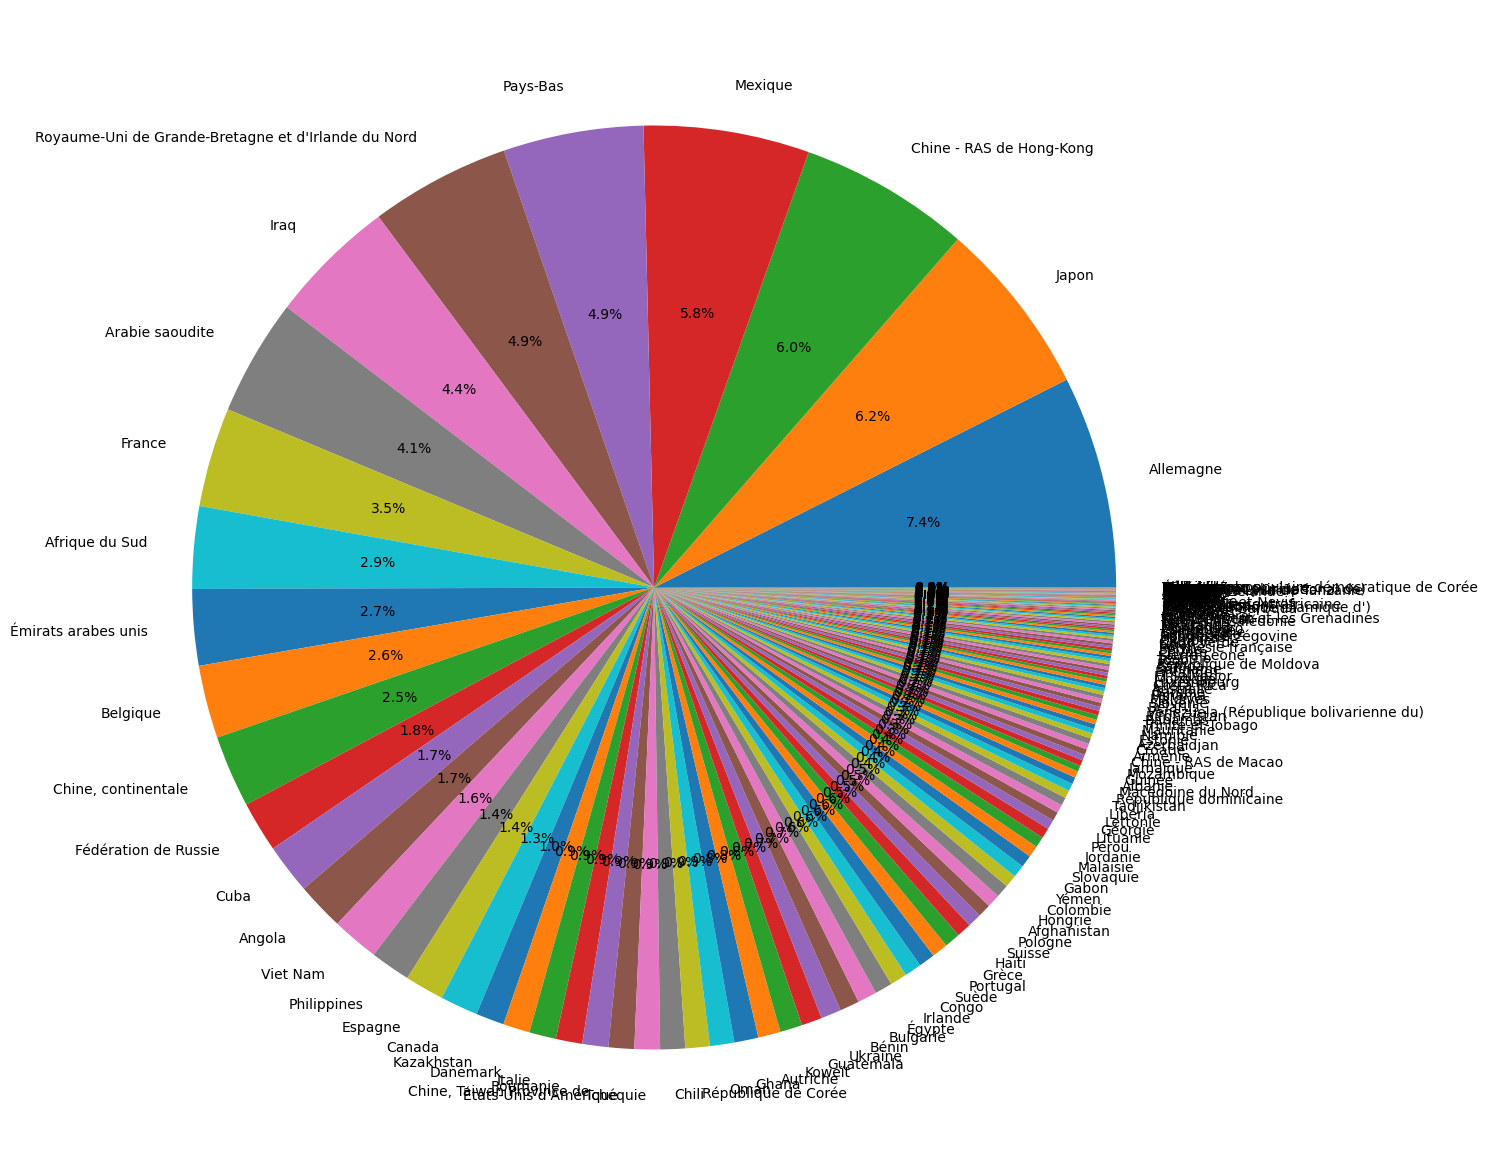

In [21]:
# Visualisation sous forme de diagramme circulaire des importations de produits issus de la volaille

plt.figure(figsize=(15, 15))

plt.pie(x = dispoVolailles['Importations 2017 de produits de volaille (kT)'], labels = dispoVolailles['Pays'], autopct='%1.1f%%')

plt.show()

## Bilan alimentaire

In [22]:
# Aperçu des données

bilanAlim = pd.read_csv('BilansAlimentaires_F_Toutes_les_Données.csv', encoding = 'latin-1')
bilanAlim

,Code zone,Code zone (M49),Zone,Code Produit,Code Produit (CPC),Produit,Code Élément,Élément,Unité,Y2010,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,'004,Afghanistan,2501,'S2501,Population,511,Population totale,1000 personnes,29186.00,...,35383.00,X,36296.00,X,37172.00,X,38041.75,X,38928.35,X
1,2,'004,Afghanistan,2501,'S2501,Population,5301,Disponibilité intérieure,Milliers de tonnes,0.00,...,0.00,I,0.00,I,0.00,I,0.00,I,0.00,I
2,2,'004,Afghanistan,2901,'S2901,Total General,664,Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour,2170.00,...,2228.00,E,2303.00,E,2270.00,E,2236.00,E,2240.00,E
3,2,'004,Afghanistan,2901,'S2901,Total General,661,Disponibilité alimentaire (Kcal),million kcal,23112165.71,...,28775440.50,E,30507233.00,E,30799508.70,E,31052348.87,E,31832678.75,E
4,2,'004,Afghanistan,2901,'S2901,Total General,674,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,59.23,...,58.46,E,59.50,E,57.66,E,56.06,E,56.64,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388749,5817,'902,Imp Nets Prod Alim Dvpm,2899,'S2899,Miscellanees,661,Disponibilité alimentaire (Kcal),million kcal,322626.20,...,422965.47,E,437078.93,E,467314.17,E,547931.42,E,559674.90,E
388750,5817,'902,Imp Nets Prod Alim Dvpm,2899,'S2899,Miscellanees,674,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.02,...,0.02,E,0.02,E,0.02,E,0.03,E,0.03,E
388751,5817,'902,Imp Nets Prod Alim Dvpm,2899,'S2899,Miscellanees,671,Disponibilité de protéines en quantité (g),g,9443.68,...,12381.77,E,12790.92,E,13676.00,E,16037.02,E,16380.73,E
388752,5817,'902,Imp Nets Prod Alim Dvpm,2899,'S2899,Miscellanees,684,Disponibilité de matière grasse en quantité (g...,g/personne/jour,0.01,...,0.01,E,0.01,E,0.01,E,0.01,E,0.01,E


In [23]:
bilanAlim['Produit'].unique()

array(['Population', 'Total General', 'Produits Vegetaux',
       'Produits Animaux', 'Cèrèales - Excl Bière', 'Blé et produits',
       'Riz et produits', 'Orge et produits', 'Maïs et produits',
       'Seigle et produits', 'Avoine', 'Millet et produits',
       'Sorgho et produits', 'Céréales, Autres', 'Racines Amyl',
       'Manioc et produits', 'Pommes de Terre et produits',
       'Patates douces', 'Ignames', 'Racines nda', 'Cultures Sucrieres',
       'Sucre, canne', 'Sucre, betterave', 'Sucre & Edulcorants',
       'Sucre non centrifugé', 'Sucre Eq Brut', 'Edulcorants Autres',
       'Miel', 'Légumineuses Sèches', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Fruit Coque',
       'Noix et produits', 'Cultures Oleágineuses', 'Soja', 'Arachides',
       'Graines de tournesol', 'Graines Colza/Moutarde',
       'Graines de coton', 'Coco (Incl Coprah)', 'Sésame', 'Palmistes',
       'Olives', 'Plantes Oleiferes, Autre', 'Huiles végétales',
       'Huile de Soja', "Hu

In [24]:
bilanAlim['Élément'].unique()

array(['Population totale', 'Disponibilité intérieure',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire (Kcal)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g)', 'Production',
       'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Aliments pour animaux', 'Semences',
       'Pertes', 'Traitement', 'Autres utilisations (non alimentaire)',
       'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Alimentation pour touristes'], dtype=object)

In [25]:
# Sélection des données liées à la volaille

liste_produit = ('Viande de Volailles', 'Oeufs')

bilanAlim = bilanAlim[bilanAlim['Produit'].isin(liste_produit)]
bilanAlim

,Code zone,Code zone (M49),Zone,Code Produit,Code Produit (CPC),Produit,Code Élément,Élément,Unité,Y2010,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
1361,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5511,Production,Milliers de tonnes,28.00,...,24.00,I,28.00,I,29.00,I,28.00,I,28.00,I
1362,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5611,Importations - Quantité,Milliers de tonnes,39.00,...,37.00,I,29.00,I,25.00,I,44.00,I,36.00,I
1363,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5072,Variation de stock,Milliers de tonnes,2.00,...,-8.00,I,-7.00,I,0.00,I,3.00,I,-2.00,I
1364,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5911,Exportations - Quantité,Milliers de tonnes,NaN,...,NaN,NaN,NaN,NaN,0.00,I,NaN,NaN,0.00,I
1365,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5301,Disponibilité intérieure,Milliers de tonnes,65.00,...,69.00,I,64.00,I,53.00,I,69.00,I,67.00,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388484,5817,'902,Imp Nets Prod Alim Dvpm,2744,'S2744,Oeufs,661,Disponibilité alimentaire (Kcal),million kcal,4001070.24,...,5374275.49,E,5944102.22,E,6037435.57,E,6110079.35,E,6380700.36,E
388485,5817,'902,Imp Nets Prod Alim Dvpm,2744,'S2744,Oeufs,674,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.67,...,0.76,E,0.83,E,0.82,E,0.81,E,0.83,E
388486,5817,'902,Imp Nets Prod Alim Dvpm,2744,'S2744,Oeufs,671,Disponibilité de protéines en quantité (g),g,311986.72,...,417250.43,E,461600.99,E,468978.36,E,474772.67,E,494876.39,E
388487,5817,'902,Imp Nets Prod Alim Dvpm,2744,'S2744,Oeufs,684,Disponibilité de matière grasse en quantité (g...,g/personne/jour,0.60,...,0.69,E,0.74,E,0.74,E,0.73,E,0.75,E


In [26]:
bilanAlim.head(20)

,Code zone,Code zone (M49),Zone,Code Produit,Code Produit (CPC),Produit,Code Élément,Élément,Unité,Y2010,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
1361,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5511,Production,Milliers de tonnes,28.00,...,24.00,I,28.00,I,29.00,I,28.00,I,28.00,I
1362,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5611,Importations - Quantité,Milliers de tonnes,39.00,...,37.00,I,29.00,I,25.00,I,44.00,I,36.00,I
1363,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5072,Variation de stock,Milliers de tonnes,2.00,...,-8.00,I,-7.00,I,0.00,I,3.00,I,-2.00,I
1364,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5911,Exportations - Quantité,Milliers de tonnes,NaN,...,NaN,NaN,NaN,NaN,0.00,I,NaN,NaN,0.00,I
1365,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5301,Disponibilité intérieure,Milliers de tonnes,65.00,...,69.00,I,64.00,I,53.00,I,69.00,I,67.00,I
1366,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5131,Traitement,Milliers de tonnes,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1367,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5170,Résidus,Milliers de tonnes,0.00,...,0.00,I,0.00,I,0.00,I,0.00,I,0.00,I
1368,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,5142,Nourriture,Milliers de tonnes,65.00,...,69.00,I,64.00,I,53.00,I,69.00,I,67.00,I
1369,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,645,Disponibilité alimentaire en quantité (kg/pers...,kg,2.21,...,1.96,E,1.76,E,1.44,E,1.80,E,1.71,E
1370,2,'004,Afghanistan,2734,'S2734,Viande de Volailles,664,Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour,7.69,...,6.82,E,6.14,E,5.03,E,6.29,E,5.98,E


In [27]:
bilanAlim.columns

Index(['Code zone', 'Code zone (M49)', 'Zone', 'Code Produit',
       'Code Produit (CPC)', 'Produit', 'Code Élément', 'Élément', 'Unité',
       'Y2010', 'Y2010F', 'Y2011', 'Y2011F', 'Y2012', 'Y2012F', 'Y2013',
       'Y2013F', 'Y2014', 'Y2014F', 'Y2015', 'Y2015F', 'Y2016', 'Y2016F',
       'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019', 'Y2019F', 'Y2020',
       'Y2020F'],
      dtype='object')

In [28]:
# Suppression des colonnes non nécessaires

bilanAlim = bilanAlim.drop(columns = ['Code zone', 'Code zone (M49)', 'Code Produit', 'Code Produit (CPC)', 'Code Élément', 'Y2010F', 'Y2011F', 'Y2012F','Y2013F', 'Y2014F', 'Y2015F', 'Y2016F', 'Y2017F', 'Y2018F', 'Y2019F','Y2020F'])
bilanAlim = bilanAlim.rename(columns = {'Zone' : 'Pays'})
bilanAlim

,Pays,Produit,Élément,Unité,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
1361,Afghanistan,Viande de Volailles,Production,Milliers de tonnes,28.00,26.00,25.00,26.00,25.00,25.00,24.00,28.00,29.00,28.00,28.00
1362,Afghanistan,Viande de Volailles,Importations - Quantité,Milliers de tonnes,39.00,51.00,22.00,48.00,43.00,43.00,37.00,29.00,25.00,44.00,36.00
1363,Afghanistan,Viande de Volailles,Variation de stock,Milliers de tonnes,2.00,20.00,-16.00,8.00,-1.00,1.00,-8.00,-7.00,0.00,3.00,-2.00
1364,Afghanistan,Viande de Volailles,Exportations - Quantité,Milliers de tonnes,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00
1365,Afghanistan,Viande de Volailles,Disponibilité intérieure,Milliers de tonnes,65.00,56.00,62.00,67.00,69.00,66.00,69.00,64.00,53.00,69.00,67.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388484,Imp Nets Prod Alim Dvpm,Oeufs,Disponibilité alimentaire (Kcal),million kcal,4001070.24,4226104.38,4654274.38,4802702.38,5230503.63,5322941.02,5374275.49,5944102.22,6037435.57,6110079.35,6380700.36
388485,Imp Nets Prod Alim Dvpm,Oeufs,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.67,0.69,0.73,0.73,0.78,0.77,0.76,0.83,0.82,0.81,0.83
388486,Imp Nets Prod Alim Dvpm,Oeufs,Disponibilité de protéines en quantité (g),g,311986.72,329557.06,362367.06,373899.06,406798.99,413762.23,417250.43,461600.99,468978.36,474772.67,494876.39
388487,Imp Nets Prod Alim Dvpm,Oeufs,Disponibilité de matière grasse en quantité (g...,g/personne/jour,0.60,0.62,0.65,0.66,0.70,0.69,0.69,0.74,0.74,0.73,0.75


In [29]:
# Vérification des valeurs de 'Pays'

bilanAlim['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus', 'Belgique',
       'Belize', 'Bénin', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Espagne', 'Estonie',
       'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',


In [30]:
# Suppression des zones élargies du monde

liste_zone = ('Monde', 'Afrique', 'Afrique orientale',
       'Afrique centrale', 'Afrique septentrionale', 'Afrique australe',
       'Afrique occidentale', 'Amériques', 'Amérique septentrionale',
       'Amérique centrale', 'Caraïbes', 'Amérique du Sud', 'Asie',
       'Asie centrale', 'Asie orientale', 'Asie méridionale',
       'Asie du Sud-Est', 'Asie occidentale', 'Europe',
       'Europe orientale', 'Europe septentrionale', 'Europe méridionale',
       'Europe occidentale', 'Océanie', 'Australie et Nouvelle-Zélande',
       'Mélanésie', 'Micronésie', 'Polynésie', 'Union Européenne (27)',
       'Pays les moins développés',
       'Pays sans littoral en voie de développement',
       'Petites îles en voie de Développement',
       'Pays à faible revenu et à déficit vivrier',
       'Imp Nets Prod Alim Dvpm')

bilanAlim = bilanAlim[~bilanAlim['Pays'].isin(liste_zone)]
bilanAlim

,Pays,Produit,Élément,Unité,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
1361,Afghanistan,Viande de Volailles,Production,Milliers de tonnes,28.00,26.00,25.00,26.00,25.00,25.00,24.00,28.00,29.00,28.00,28.00
1362,Afghanistan,Viande de Volailles,Importations - Quantité,Milliers de tonnes,39.00,51.00,22.00,48.00,43.00,43.00,37.00,29.00,25.00,44.00,36.00
1363,Afghanistan,Viande de Volailles,Variation de stock,Milliers de tonnes,2.00,20.00,-16.00,8.00,-1.00,1.00,-8.00,-7.00,0.00,3.00,-2.00
1364,Afghanistan,Viande de Volailles,Exportations - Quantité,Milliers de tonnes,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00
1365,Afghanistan,Viande de Volailles,Disponibilité intérieure,Milliers de tonnes,65.00,56.00,62.00,67.00,69.00,66.00,69.00,64.00,53.00,69.00,67.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319547,Zimbabwe,Oeufs,Disponibilité alimentaire (Kcal),million kcal,31815.83,28210.97,28894.58,29383.64,33396.96,19215.36,21631.17,24371.05,25333.06,23767.59,23723.08
319548,Zimbabwe,Oeufs,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.58,0.50,0.51,0.50,0.56,0.31,0.35,0.39,0.40,0.37,0.37
319549,Zimbabwe,Oeufs,Disponibilité de protéines en quantité (g),g,2668.84,2368.59,2426.19,2450.65,2777.67,1571.20,1795.64,2038.83,2123.38,1995.27,1991.90
319550,Zimbabwe,Oeufs,Disponibilité de matière grasse en quantité (g...,g/personne/jour,0.47,0.41,0.41,0.41,0.46,0.26,0.29,0.32,0.33,0.30,0.30


In [31]:
# Vérification des valeurs de la colonne 'Elément'

bilanAlim['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Traitement', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire (Kcal)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g)', 'Semences',
       'Pertes', 'Alimentation pour touristes',
       'Autres utilisations (non alimentaire)', 'Aliments pour animaux'],
      dtype=object)

In [32]:
# Sélection de la 'Disponibilité alimentaire en quantité (kg/personne/an)'

bilanAlim = bilanAlim.loc[bilanAlim['Élément'] == 'Disponibilité alimentaire en quantité (kg/personne/an)']
bilanAlim

,Pays,Produit,Élément,Unité,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
1369,Afghanistan,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,2.21,1.86,2.00,2.06,2.07,1.92,1.96,1.76,1.44,1.80,1.71
1492,Afghanistan,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,0.87,1.06,0.88,1.23,1.69,1.74,1.68,1.78,1.55,0.89,1.11
1507,Afghanistan,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,0.87,1.06,0.88,1.23,1.69,1.74,1.68,1.78,1.55,0.89,1.11
2987,Afrique du Sud,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,33.38,34.80,35.25,36.83,37.25,36.78,36.77,37.01,37.31,37.20,34.86
3140,Afrique du Sud,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,6.10,6.61,6.84,6.42,6.11,6.91,6.22,5.77,5.87,7.14,7.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317766,Zambie,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,3.09,3.27,3.24,3.14,3.44,3.39,3.38,3.35,3.25,3.14,3.07
317782,Zambie,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,3.09,3.27,3.24,3.14,3.44,3.39,3.38,3.35,3.25,3.14,3.07
319383,Zimbabwe,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,6.26,6.93,7.03,5.27,4.81,5.01,5.33,5.27,4.57,4.69,4.62
319528,Zimbabwe,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,2.01,1.76,1.77,1.75,1.95,1.08,1.22,1.37,1.41,1.30,1.28


In [33]:
# Suppression des doublons produit 'oeufs'

bilanAlim = bilanAlim.drop_duplicates()
bilanAlim

,Pays,Produit,Élément,Unité,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
1369,Afghanistan,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,2.21,1.86,2.00,2.06,2.07,1.92,1.96,1.76,1.44,1.80,1.71
1492,Afghanistan,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,0.87,1.06,0.88,1.23,1.69,1.74,1.68,1.78,1.55,0.89,1.11
2987,Afrique du Sud,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,33.38,34.80,35.25,36.83,37.25,36.78,36.77,37.01,37.31,37.20,34.86
3140,Afrique du Sud,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,6.10,6.61,6.84,6.42,6.11,6.91,6.22,5.77,5.87,7.14,7.52
4640,Albanie,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,14.34,14.16,13.55,14.14,11.78,11.89,13.54,11.45,9.48,12.23,13.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315959,Yémen,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,2.00,1.98,1.98,2.03,2.00,1.90,1.85,1.78,1.58,1.91,1.82
317615,Zambie,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,3.17,3.14,3.17,3.20,3.30,3.38,3.57,3.58,3.42,2.80,2.64
317766,Zambie,Oeufs,Disponibilité alimentaire en quantité (kg/pers...,kg,3.09,3.27,3.24,3.14,3.44,3.39,3.38,3.35,3.25,3.14,3.07
319383,Zimbabwe,Viande de Volailles,Disponibilité alimentaire en quantité (kg/pers...,kg,6.26,6.93,7.03,5.27,4.81,5.01,5.33,5.27,4.57,4.69,4.62


In [34]:
bilanAlim.columns

Index(['Pays', 'Produit', 'Élément', 'Unité', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020'],
      dtype='object')

In [35]:
# Aggrégation des données de volaille et d'oeufs

bilanAlim = bilanAlim[['Pays', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020']].groupby('Pays').sum()
bilanAlim = bilanAlim.reset_index()
bilanAlim

,Pays,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,3.08,2.92,2.88,3.29,3.76,3.66,3.64,3.54,2.99,2.69,2.82
1,Afrique du Sud,39.48,41.41,42.09,43.25,43.36,43.69,42.99,42.78,43.18,44.34,42.38
2,Albanie,22.24,22.48,27.18,27.77,25.76,26.85,28.81,26.11,24.72,28.01,29.78
3,Algérie,13.84,14.20,14.90,15.65,15.92,16.62,15.90,14.07,13.47,13.27,12.73
4,Allemagne,29.65,30.18,29.13,29.63,29.97,30.33,30.98,30.82,31.36,32.92,33.64
...,...,...,...,...,...,...,...,...,...,...,...,...
181,Émirats arabes unis,21.71,22.55,24.90,25.60,28.82,37.01,36.06,32.37,38.32,40.64,38.32
182,Équateur,29.17,29.08,29.98,31.33,30.65,29.51,25.92,26.36,24.70,26.52,26.73
183,États-Unis d'Amérique,64.96,65.40,63.76,64.59,66.13,69.31,70.79,71.64,73.13,74.84,74.81
184,Éthiopie,1.01,0.91,0.93,0.98,1.04,1.17,1.20,1.12,1.06,0.91,0.93


In [36]:
# Calcul de l'évolution de la disponibilité de volailles et d'oeufs entre 2010 et 2020

bilanAlim['évol 2010-2020'] = round(bilanAlim['Y2020'] / bilanAlim['Y2010'], 2)
bilanAlim.sort_values('évol 2010-2020', ascending = False).head(30)

,Pays,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,évol 2010-2020
156,Soudan du Sud,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.72,4.34,inf
105,Micronésie (États fédérés de),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.54,43.88,inf
111,Nauru,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.94,53.46,inf
132,Qatar,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70.26,69.72,inf
19,Bhoutan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.51,13.48,inf
155,Soudan,0.00,0.00,2.25,2.36,2.45,2.50,2.61,2.65,2.92,3.12,3.27,inf
14,Bahreïn,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,52.44,52.76,inf
26,Burundi,0.00,0.00,0.00,0.00,0.70,0.68,0.67,0.69,0.60,0.72,0.71,inf
42,Congo,7.70,9.86,10.39,13.11,14.02,16.18,15.65,21.40,22.88,21.17,23.64,3.07
59,Gambie,3.75,4.70,4.27,3.24,5.37,7.41,8.57,9.25,11.08,12.35,11.28,3.01


In [37]:
# Calcul de la disponibilité en produits issus de la volaille sur les 3 dernières années

bilanAlim['évol 2018-2020'] = round(bilanAlim['Y2020'] / bilanAlim['Y2018'], 2)
bilanAlim.sort_values('évol 2018-2020', ascending = False).head(30)


,Pays,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,évol 2010-2020,évol 2018-2020
14,Bahreïn,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,52.44,52.76,inf,inf
132,Qatar,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70.26,69.72,inf,inf
105,Micronésie (États fédérés de),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42.54,43.88,inf,inf
111,Nauru,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.94,53.46,inf,inf
156,Soudan du Sud,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.72,4.34,inf,inf
19,Bhoutan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.51,13.48,inf,inf
25,Burkina Faso,5.12,5.08,5.00,4.82,4.72,5.00,4.52,4.01,4.28,11.23,10.61,2.07,2.48
41,Comores,14.99,15.21,15.18,16.76,17.45,16.85,17.89,17.96,15.90,2.52,28.57,1.91,1.80
173,Uruguay,29.54,31.48,32.47,24.43,28.22,20.42,21.09,20.75,20.88,33.82,34.48,1.17,1.65
85,Kiribati,16.62,17.01,15.09,15.40,15.71,16.23,18.92,18.59,18.66,25.01,28.46,1.71,1.53


In [38]:
# Suppression des valeurs infinies

bilanAlim = bilanAlim.loc[bilanAlim['évol 2018-2020'] != float('inf')]
bilanAlim = bilanAlim.sort_values('évol 2018-2020', ascending = False)
bilanAlim

,Pays,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,évol 2010-2020,évol 2018-2020
25,Burkina Faso,5.12,5.08,5.00,4.82,4.72,5.00,4.52,4.01,4.28,11.23,10.61,2.07,2.48
41,Comores,14.99,15.21,15.18,16.76,17.45,16.85,17.89,17.96,15.90,2.52,28.57,1.91,1.80
173,Uruguay,29.54,31.48,32.47,24.43,28.22,20.42,21.09,20.75,20.88,33.82,34.48,1.17,1.65
85,Kiribati,16.62,17.01,15.09,15.40,15.71,16.23,18.92,18.59,18.66,25.01,28.46,1.71,1.53
149,Sao Tomé-et-Principe,13.78,11.47,11.65,12.04,12.37,11.85,10.34,10.14,12.65,18.79,17.87,1.30,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Angola,12.41,14.24,15.81,15.43,16.37,10.19,9.02,10.74,12.29,9.93,8.48,0.68,0.69
54,Fidji,21.74,27.35,33.54,25.19,27.30,32.05,29.51,31.24,50.17,46.92,34.72,1.60,0.69
97,Malawi,2.80,4.88,5.99,5.74,5.89,6.88,5.79,8.40,11.57,6.61,6.68,2.39,0.58
74,Iraq,21.63,26.10,27.00,26.41,21.55,19.61,19.51,26.30,21.07,12.90,8.06,0.37,0.38


In [39]:
# On isole les valeurs de l'évolution 2018 - 2020

conso2018_2020 = bilanAlim[['Pays','évol 2018-2020']]
conso2018_2020 = conso2018_2020.rename(columns = {'évol 2018-2020' : 'Evolution 2018-2020 de la consommation de produits de volaille (%)'})

conso2018_2020

,Pays,Evolution 2018-2020 de la consommation de produits de volaille (%)
25,Burkina Faso,2.48
41,Comores,1.80
173,Uruguay,1.65
85,Kiribati,1.53
149,Sao Tomé-et-Principe,1.41
...,...,...
5,Angola,0.69
54,Fidji,0.69
97,Malawi,0.58
74,Iraq,0.38


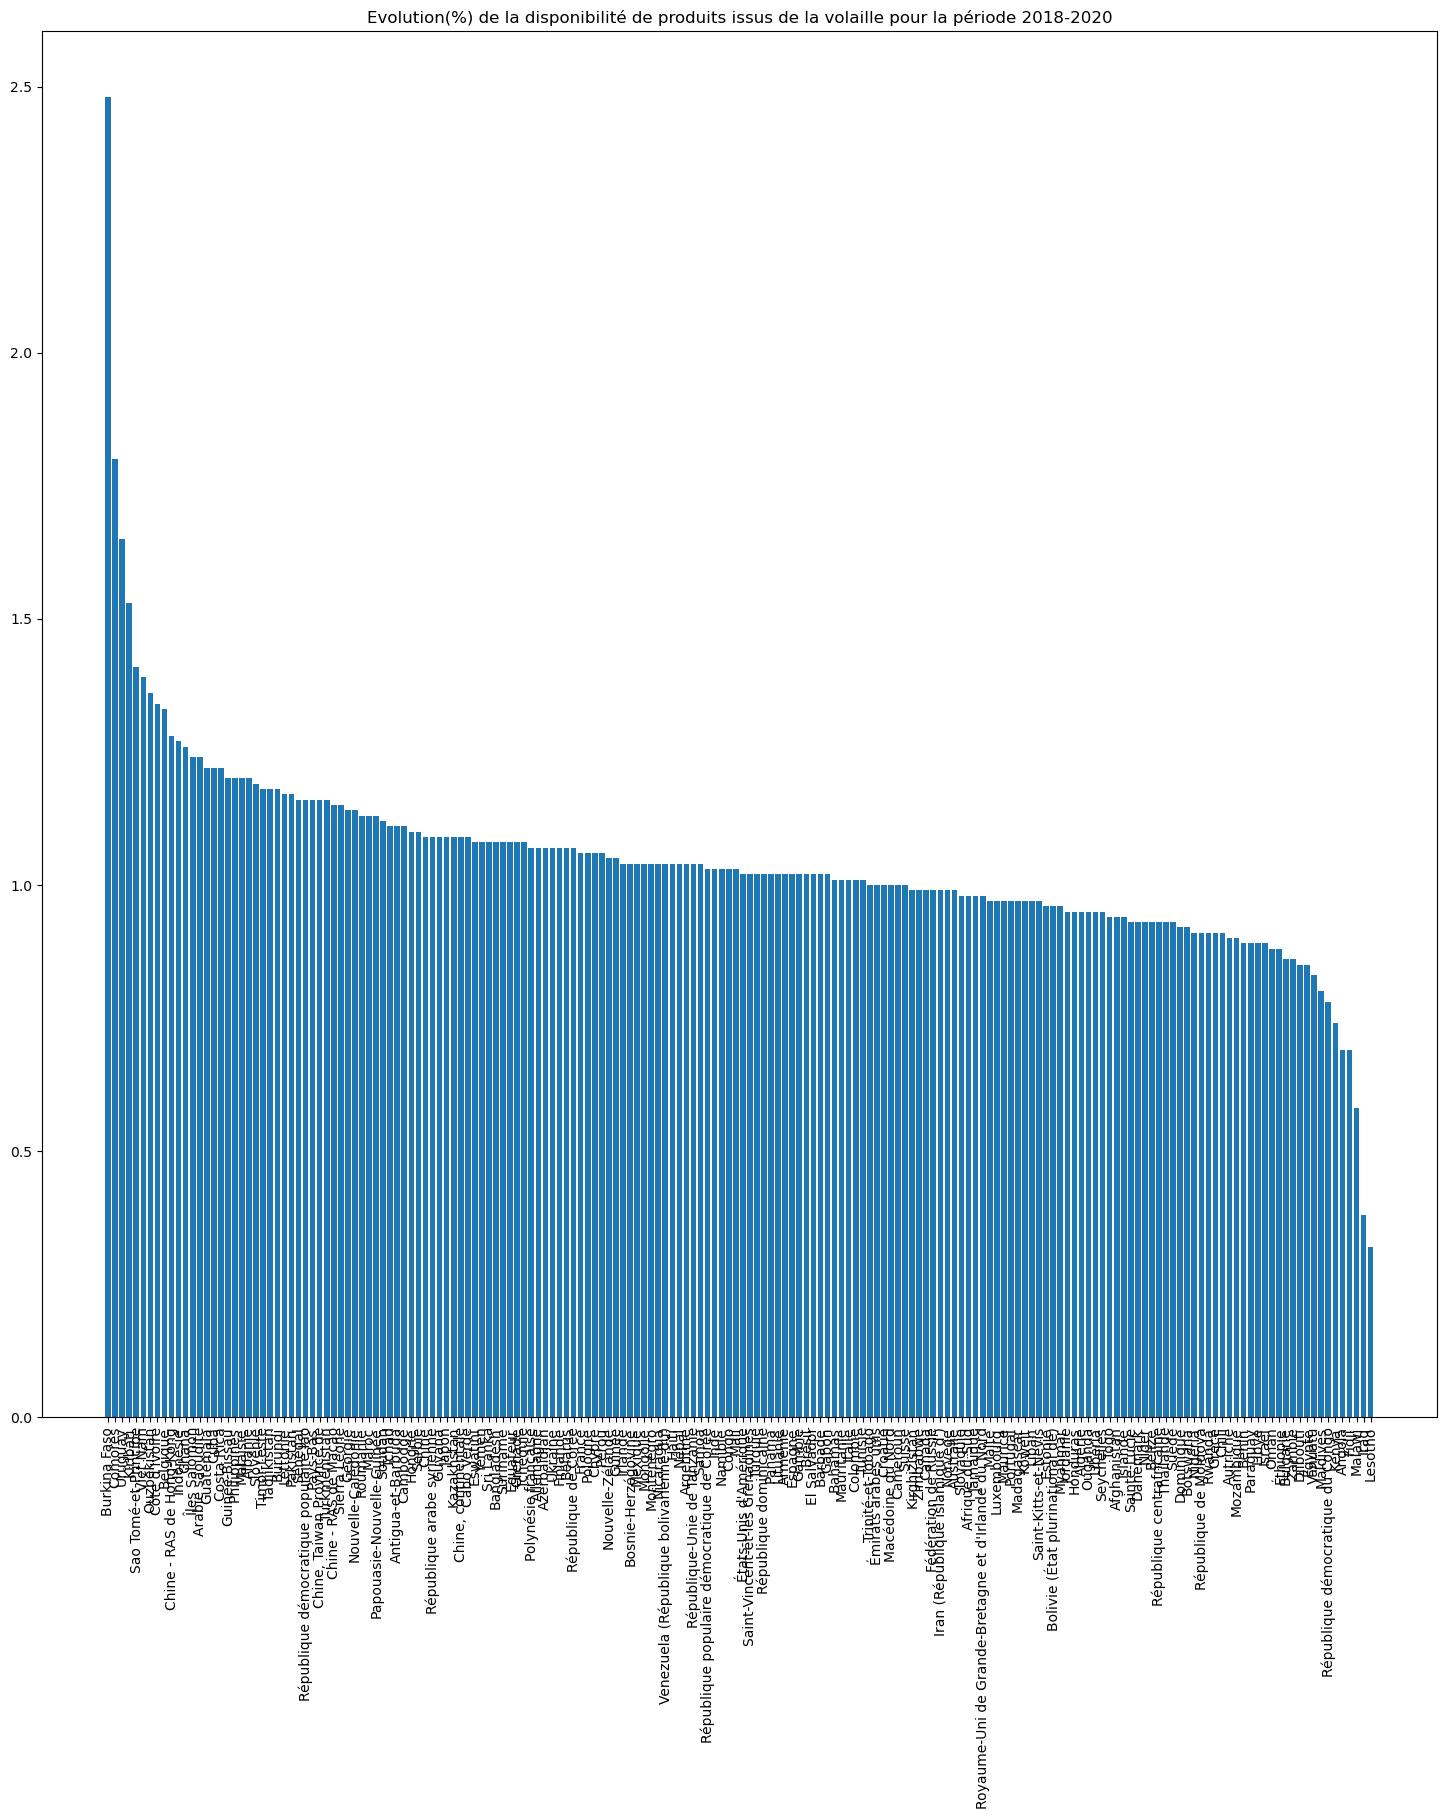

In [40]:
# barplot de visualisation des pays selon l'évolution de la disponibilité de volailles et d'oeufs en kg par personne entre 2018 et 2020

plt.figure(figsize=(18, 18))

plt.bar(conso2018_2020['Pays'], conso2018_2020['Evolution 2018-2020 de la consommation de produits de volaille (%)'])
plt.xticks(rotation='vertical')
plt.title('Evolution(%) de la disponibilité de produits issus de la volaille pour la période 2018-2020')

plt.show()

## Sécurité alimentaire

In [41]:
secuAlim = pd.read_csv('Données_de_la_sécurité_alimentaire_F_Toutes_les_Données_(Normalisé).csv', encoding = 'latin-1')
secuAlim

C:\Users\sebhe\AppData\Local\Temp\ipykernel_24164\2818744348.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  secuAlim = pd.read_csv('Données_de_la_sécurité_alimentaire_F_Toutes_les_Données_(Normalisé).csv', encoding = 'latin-1')


,Code zone,Code zone (M49),Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
0,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20002002,2000-2002,%,126,E,NaN
1,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20012003,2001-2003,%,125,E,NaN
2,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20022004,2002-2004,%,124,E,NaN
3,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20032005,2003-2005,%,124,E,NaN
4,150,'528,\tPays-Bas (Royaume des),21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20042006,2004-2006,%,125,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225541,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20152017,2015-2017,g/personne/jour,99.5,E,NaN
225542,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20162018,2016-2018,g/personne/jour,101.1,E,NaN
225543,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20172019,2017-2019,g/personne/jour,102.1,E,NaN
225544,9011,'906,Upper-middle-income economies,21061,Disponibilités moyennes de matière grasse (g/p...,6123,Valeur,20182020,2018-2020,g/personne/jour,NaN,O,NaN


In [42]:
secuAlim = secuAlim.drop(columns = ['Code zone', 'Code zone (M49)', 'Code Produit', 'Code Élément', 'Élément', 'Code année', 'Symbole', 'Note'])
secuAlim = secuAlim.rename(columns = {'Zone' : 'Pays'})
secuAlim

,Pays,Produit,Année,Unité,Valeur
0,\tPays-Bas (Royaume des),Suffisance des apports énergétiques alimentair...,2000-2002,%,126
1,\tPays-Bas (Royaume des),Suffisance des apports énergétiques alimentair...,2001-2003,%,125
2,\tPays-Bas (Royaume des),Suffisance des apports énergétiques alimentair...,2002-2004,%,124
3,\tPays-Bas (Royaume des),Suffisance des apports énergétiques alimentair...,2003-2005,%,124
4,\tPays-Bas (Royaume des),Suffisance des apports énergétiques alimentair...,2004-2006,%,125
...,...,...,...,...,...
225541,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2015-2017,g/personne/jour,99.5
225542,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2016-2018,g/personne/jour,101.1
225543,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2017-2019,g/personne/jour,102.1
225544,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2018-2020,g/personne/jour,NaN


In [43]:
secuAlim['Pays'].unique()

array(['\tPays-Bas (Royaume des)', 'Afghanistan', 'Afrique du Sud',
       'Albanie', 'Algérie', 'Allemagne', 'Andorre', 'Angola',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie',
       'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bermudes', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amé

In [44]:
# Modification de la dénomination des Pays-Bas

secuAlim['Pays'] = secuAlim['Pays'].replace('\tPays-Bas (Royaume des)', 'Pays-Bas')

secuAlim

,Pays,Produit,Année,Unité,Valeur
0,Pays-Bas,Suffisance des apports énergétiques alimentair...,2000-2002,%,126
1,Pays-Bas,Suffisance des apports énergétiques alimentair...,2001-2003,%,125
2,Pays-Bas,Suffisance des apports énergétiques alimentair...,2002-2004,%,124
3,Pays-Bas,Suffisance des apports énergétiques alimentair...,2003-2005,%,124
4,Pays-Bas,Suffisance des apports énergétiques alimentair...,2004-2006,%,125
...,...,...,...,...,...
225541,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2015-2017,g/personne/jour,99.5
225542,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2016-2018,g/personne/jour,101.1
225543,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2017-2019,g/personne/jour,102.1
225544,Upper-middle-income economies,Disponibilités moyennes de matière grasse (g/p...,2018-2020,g/personne/jour,NaN


In [45]:
# Suppression des zones élargies du monde

liste_zone2 = ('Monde', 'Afrique',
       'Afrique orientale', 'Afrique centrale', 'Afrique septentrionale',
       'Afrique du Nord (Soudan Excl)', 'Afrique australe',
       'Afrique occidentale', 'Afrique subsaharienne',
       'Afrique subsaharienne (y compris Soudan)',
       'Amérique du Nord et Europe', 'Amérique septentrionale', 'Europe',
       'Europe orientale', 'Europe septentrionale', 'Europe méridionale',
       'Europe occidentale', 'Amérique latine et Caraïbes',
       'Amérique centrale', 'Caraïbes', 'Amérique du Sud', 'Asie',
       'Asie centrale', 'Asie orientale', 'Asie méridionale',
       'Asie du Sud (Inde Excl)', 'Asie du Sud-Est', 'Asie occidentale',
       'Asie centrale et Asie du Sud',
       'Asie orientale et Asie du Sud-Est',
       'Asie occidentale et Afrique du Nord', 'Océanie',
       'Australie et Nouvelle-Zélande', 'Mélanésie', 'Micronésie',
       'Polynésie', 'Océanie, hors Australie et Nouvelle-Zélande',
       'Pays les moins développés',
       'Pays sans littoral en voie de développement',
       'Petites îles en voie de Développement',
       'Pays à faible revenu et à déficit vivrier',
       'Pays à faible revenu', 'Pays à revenu moyen',
       'High-income economies', 'Upper-middle-income economies')

secuAlim = secuAlim[~secuAlim['Pays'].isin(liste_zone2)]
secuAlim

,Pays,Produit,Année,Unité,Valeur
0,Pays-Bas,Suffisance des apports énergétiques alimentair...,2000-2002,%,126
1,Pays-Bas,Suffisance des apports énergétiques alimentair...,2001-2003,%,125
2,Pays-Bas,Suffisance des apports énergétiques alimentair...,2002-2004,%,124
3,Pays-Bas,Suffisance des apports énergétiques alimentair...,2003-2005,%,124
4,Pays-Bas,Suffisance des apports énergétiques alimentair...,2004-2006,%,125
...,...,...,...,...,...
174253,Zimbabwe,Disponibilités moyennes de matière grasse (g/p...,2015-2017,g/personne/jour,55.6
174254,Zimbabwe,Disponibilités moyennes de matière grasse (g/p...,2016-2018,g/personne/jour,54.3
174255,Zimbabwe,Disponibilités moyennes de matière grasse (g/p...,2017-2019,g/personne/jour,51.3
174256,Zimbabwe,Disponibilités moyennes de matière grasse (g/p...,2018-2020,g/personne/jour,NaN


In [46]:
secuAlim['Produit'].unique()

array(['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       "Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
       'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilités protéines moyennes d\x92origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'Densité du réseau ferroviaire (pour 100 km carrés de surface totale du pays)',
       'PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
       'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       'Prévalence de l\x92insécurité alimentaire grave \x96 population totale (%) (moyenne sur 3 ans)',
       'Prévalence de l\x92insécu

In [47]:
# Sélection des données de PIB/habt et stabilité politique

liste_produit2 = ["PIB par habitant, ($ PPA internationaux constants de 2017)", "Stabilité politique et absence de violence/terrorisme (indice)"]

secuAlim = secuAlim[secuAlim['Produit'].isin(liste_produit2)]
secuAlim

,Pays,Produit,Année,Unité,Valeur
112,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2000,I$,47422.2
113,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2012,I$,51860.1
114,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2013,I$,51640.1
115,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2014,I$,52187
116,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2015,I$,52974.1
...,...,...,...,...,...
173793,Zimbabwe,Stabilité politique et absence de violence/ter...,2016,indice,-0.62
173794,Zimbabwe,Stabilité politique et absence de violence/ter...,2017,indice,-0.71
173795,Zimbabwe,Stabilité politique et absence de violence/ter...,2018,indice,-0.72
173796,Zimbabwe,Stabilité politique et absence de violence/ter...,2019,indice,-0.96


In [48]:
# Vérification des NA et types

secuAlim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5946 entries, 112 to 173797
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pays     5946 non-null   object
 1   Produit  5946 non-null   object
 2   Année    5946 non-null   object
 3   Unité    5946 non-null   object
 4   Valeur   5946 non-null   object
dtypes: object(5)
memory usage: 278.7+ KB


In [49]:
# Modification des types

secuAlim = secuAlim.astype({'Valeur': 'float64', 'Année': 'Int64'})

secuAlim

,Pays,Produit,Année,Unité,Valeur
112,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2000,I$,47422.20
113,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2012,I$,51860.10
114,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2013,I$,51640.10
115,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2014,I$,52187.00
116,Pays-Bas,"PIB par habitant, ($ PPA internationaux consta...",2015,I$,52974.10
...,...,...,...,...,...
173793,Zimbabwe,Stabilité politique et absence de violence/ter...,2016,indice,-0.62
173794,Zimbabwe,Stabilité politique et absence de violence/ter...,2017,indice,-0.71
173795,Zimbabwe,Stabilité politique et absence de violence/ter...,2018,indice,-0.72
173796,Zimbabwe,Stabilité politique et absence de violence/ter...,2019,indice,-0.96


## PIB par habitant

In [50]:
# tableau pib/hbt pour l'année 2021

pib_hbt = secuAlim[(secuAlim['Produit'] == "PIB par habitant, ($ PPA internationaux constants de 2017)") & (secuAlim['Année'] == 2021)] 
pib_hbt = pib_hbt.drop(columns = ['Produit', 'Année', 'Unité'])
pib_hbt = pib_hbt.rename(columns = {'Valeur' : 'PIB 2021/hbt ($)'})

pib_hbt

,Pays,PIB 2021/hbt ($)
122,Pays-Bas,56761.0
1876,Afrique du Sud,13126.0
2747,Albanie,14520.1
3668,Algérie,10957.2
4592,Allemagne,52930.8
...,...,...
168248,Uruguay,22415.4
169117,Vanuatu,2826.5
170873,Viet Nam,10516.2
172599,Zambie,3298.6


In [51]:
pib_hbt['Pays'].unique()

array(['Pays-Bas', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus', 'Belgique',
       'Belize', 'Bénin', 'Bermudes', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chypre', 'Colombie', 'Comores', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Danemark', 'Djibouti',
       'Dominique', 'Égypte', 'El Salvador', 'Équateur', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Guatemala',
       '

In [52]:
# Remplacement de la valeur 'Chine', par 'Chine, continentale'

pib_hbt['Pays'] = pib_hbt['Pays'].replace('Chine', 'Chine, continentale')

pib_hbt

,Pays,PIB 2021/hbt ($)
122,Pays-Bas,56761.0
1876,Afrique du Sud,13126.0
2747,Albanie,14520.1
3668,Algérie,10957.2
4592,Allemagne,52930.8
...,...,...
168248,Uruguay,22415.4
169117,Vanuatu,2826.5
170873,Viet Nam,10516.2
172599,Zambie,3298.6


In [53]:
# tableau stabilité politique pour l'année 2020

stab_pol = secuAlim[(secuAlim['Produit'] == "Stabilité politique et absence de violence/terrorisme (indice)") & (secuAlim['Année'] == 2020)] 
stab_pol = stab_pol.drop(columns = ['Produit', 'Année', 'Unité'])
stab_pol = stab_pol.rename(columns = {'Valeur' : 'Stabilité politique 2020'})

stab_pol

,Pays,Stabilité politique 2020
458,Pays-Bas,0.85
1353,Afghanistan,-2.73
2212,Afrique du Sud,-0.24
3083,Albanie,0.08
4004,Algérie,-0.86
...,...,...
170306,Venezuela (République bolivarienne du),-1.52
171209,Viet Nam,-0.07
172083,Yémen,-2.67
172935,Zambie,-0.13


## Stabilité politique

In [54]:
stabpol = pd.read_csv('PoliticalStability.csv')
stabpol 

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total
...,...,...,...,...
3521,Zimbabwe,2014,-0.71,Total
3522,Zimbabwe,2015,-0.62,Total
3523,Zimbabwe,2016,-0.62,Total
3524,Zimbabwe,2017,-0.71,Total


In [55]:
# Modification des noms de colonnes, suppression de certaines et sélection des données les plus récentes 2018

stabpol = stabpol.loc[stabpol['Year'] == 2018]
stabpol = stabpol.drop(columns = ['Year', 'Granularity'])
stabpol = stabpol.rename(columns = {'Country' : 'Pays', 'Political_Stability' : 'Stabilité politique 2018'})

stabpol

,Pays,Stabilité politique 2018
17,Afghanistan,-2.75
35,Albania,0.38
53,Algeria,-0.79
68,American Samoa,1.21
86,Andorra,1.43
...,...,...
3453,Venezuela (Bolivarian Republic of),-1.34
3471,Viet Nam,0.20
3489,Yemen,-3.00
3507,Zambia,0.14


In [56]:
stabpol['Pays'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guin

In [57]:
# Recherche de la stabilité politique pour la Chine

stabpol.loc[stabpol['Pays'] == 'China, mainland']

,Pays,Stabilité politique 2018
716,"China, mainland",-0.26


## Production poulets

In [58]:
prod_poulet = pd.read_csv('Production poulets.csv')

prod_poulet

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,QCL,Cultures et produits animaux,4,Afghanistan,5112,Réserves,2151,Poulets,2021,2021,1000 têtes,13855.00,I,Valeur imputée
1,QCL,Cultures et produits animaux,4,Afghanistan,5424,Rendement/Poids Carcasse,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,0.1 g/An,8000.00,E,Valeur estimée
2,QCL,Cultures et produits animaux,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,28029.23,I,Valeur imputée
3,QCL,Cultures et produits animaux,4,Afghanistan,5321,Animaux Producteurs/Abattus,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,1000 têtes,35037.00,I,Valeur imputée
4,QCL,Cultures et produits animaux,710,Afrique du Sud,5112,Réserves,2151,Poulets,2021,2021,1000 têtes,170721.00,I,Valeur imputée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,QCL,Cultures et produits animaux,894,Zambie,5321,Animaux Producteurs/Abattus,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,1000 têtes,49945.00,E,Valeur estimée
761,QCL,Cultures et produits animaux,716,Zimbabwe,5112,Réserves,2151,Poulets,2021,2021,1000 têtes,17031.00,I,Valeur imputée
762,QCL,Cultures et produits animaux,716,Zimbabwe,5424,Rendement/Poids Carcasse,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,0.1 g/An,15164.00,E,Valeur estimée
763,QCL,Cultures et produits animaux,716,Zimbabwe,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,113000.00,E,Valeur estimée


In [59]:
# Détail des valeurs 'Élément'

prod_poulet['Élément'].unique()

array(['Réserves', 'Rendement/Poids Carcasse', 'Production',
       'Animaux Producteurs/Abattus'], dtype=object)

In [60]:
# Sélection de la production de poulets

prod_poulet = prod_poulet.loc[prod_poulet['Élément'] == 'Production']

prod_poulet

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
2,QCL,Cultures et produits animaux,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,28029.23,I,Valeur imputée
6,QCL,Cultures et produits animaux,710,Afrique du Sud,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,1915000.00,A,Chiffre officiel
10,QCL,Cultures et produits animaux,8,Albanie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,13250.00,A,Chiffre officiel
14,QCL,Cultures et produits animaux,12,Algérie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,257644.63,I,Valeur imputée
17,QCL,Cultures et produits animaux,276,Allemagne,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,1080000.00,A,Chiffre officiel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,QCL,Cultures et produits animaux,862,Venezuela (République bolivarienne du),5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,439846.61,I,Valeur imputée
751,QCL,Cultures et produits animaux,704,Viet Nam,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,1520263.14,I,Valeur imputée
755,QCL,Cultures et produits animaux,887,Yémen,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,205941.30,I,Valeur imputée
759,QCL,Cultures et produits animaux,894,Zambie,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,51700.11,I,Valeur imputée


In [61]:
# Vérification de la non présence de doublons parmi les pays

prod_poulet['Zone'].value_counts()

Afghanistan            1
République de Corée    1
Nioué                  1
Norvège                1
Nouvelle-Calédonie     1
                      ..
Ghana                  1
Grèce                  1
Grenade                1
Guatemala              1
Zimbabwe               1
Name: Zone, Length: 195, dtype: int64

In [62]:
# Nettoyage des colonnes du tableau

prod_poulet = prod_poulet[['Zone', 'Valeur']]
prod_poulet = prod_poulet.rename(columns = {'Zone' : 'Pays', 'Valeur' : 'Production 2021 de viande de poulet (kT)'})
prod_poulet['Production 2021 de viande de poulet (kT)'] = round(prod_poulet['Production 2021 de viande de poulet (kT)'] / 1000, 2)

prod_poulet

,Pays,Production 2021 de viande de poulet (kT)
2,Afghanistan,28.03
6,Afrique du Sud,1915.00
10,Albanie,13.25
14,Algérie,257.64
17,Allemagne,1080.00
...,...,...
747,Venezuela (République bolivarienne du),439.85
751,Viet Nam,1520.26
755,Yémen,205.94
759,Zambie,51.70


In [63]:
prod_poulet['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus', 'Belgique',
       'Belize', 'Bénin', 'Bhoutan', 'Bolivie (État plurinational de)',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Brunéi Darussalam',
       'Bulgarie', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande'

In [64]:
# Suppression de la variable 'Chine' dans Pays

prod_poulet = prod_poulet.loc[prod_poulet['Pays'] != 'Chine']

prod_poulet

,Pays,Production 2021 de viande de poulet (kT)
2,Afghanistan,28.03
6,Afrique du Sud,1915.00
10,Albanie,13.25
14,Algérie,257.64
17,Allemagne,1080.00
...,...,...
747,Venezuela (République bolivarienne du),439.85
751,Viet Nam,1520.26
755,Yémen,205.94
759,Zambie,51.70


In [65]:
# Modification du nom des Pays-Bas

prod_poulet.loc[prod_poulet['Pays'] == 'Pays-Bas (Royaume des)', 'Pays'] = 'Pays-Bas'

prod_poulet

,Pays,Production 2021 de viande de poulet (kT)
2,Afghanistan,28.03
6,Afrique du Sud,1915.00
10,Albanie,13.25
14,Algérie,257.64
17,Allemagne,1080.00
...,...,...
747,Venezuela (République bolivarienne du),439.85
751,Viet Nam,1520.26
755,Yémen,205.94
759,Zambie,51.70


***

***

# 2. FUSION DES DONNEES POUR TABLEAU FINAL D'ETUDE

In [66]:
# Fusion des tableau pop2018 et dispoVolailles

data = pd.merge(pop2018, dispoVolailles, on = 'Pays', how = 'outer', indicator = True)

data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),_merge
0,Afghanistan,37.172,83.0,48.0,both
1,Afrique du Sud,57.793,516.0,2100.0,both
2,Albanie,2.883,38.0,64.0,both
3,Algérie,42.228,2.0,665.0,both
4,Allemagne,83.124,1333.0,2340.0,both
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),28.887,25.0,764.0,both
232,Viet Nam,95.546,295.0,1450.0,both
233,Yémen,28.499,78.0,234.0,both
234,Zambie,17.352,12.0,101.0,both


In [67]:
data['_merge'].value_counts()

both          170
left_only      66
right_only      0
Name: _merge, dtype: int64

In [68]:
# Vérification d'éventuelles anomalies de pays pour lesquels il n'y a pas de données sur les imports/exports de volaille

data.loc[data['_merge'] == 'left_only']['Pays'].unique()

array(['Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bahreïn', 'Bermudes', 'Bhoutan',
       'Bonaire, Saint-Eustache et Saba', 'Brunéi Darussalam', 'Burundi',
       'Comores', 'Curaçao', 'Érythrée', 'Gibraltar', 'Groenland',
       'Guadeloupe', 'Guam', 'Guinée équatoriale', 'Guyane française',
       'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Marshall', 'Îles Turques-et-Caïques',
       'Îles Vierges américaines', 'Îles Vierges britanniques',
       'Îles Wallis-et-Futuna', 'Libye', 'Liechtenstein', 'Martinique',
       'Mayotte', 'Micronésie (États fédérés de)', 'Monaco', 'Montserrat',
       'Nauru', 'Nioué', 'Ouzbékistan', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Porto Rico', 'Qatar',
       'République arabe syrienne', 'République démocratique du Congo',
       'République démocratique populaire lao', 'Réunion',
       'Saha

In [69]:
# Suppression de la colonne _merge

data = data.drop(columns=['_merge'])

In [70]:
# Fusion des tableau data et production de viande de poulet

data = pd.merge(data, prod_poulet, on = 'Pays', how = 'outer', indicator = True)

data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),_merge
0,Afghanistan,37.172,83.0,48.0,28.03,both
1,Afrique du Sud,57.793,516.0,2100.0,1915.00,both
2,Albanie,2.883,38.0,64.0,13.25,both
3,Algérie,42.228,2.0,665.0,257.64,both
4,Allemagne,83.124,1333.0,2340.0,1080.00,both
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),28.887,25.0,764.0,439.85,both
232,Viet Nam,95.546,295.0,1450.0,1520.26,both
233,Yémen,28.499,78.0,234.0,205.94,both
234,Zambie,17.352,12.0,101.0,51.70,both


In [71]:
data['_merge'].value_counts()

both          194
left_only      42
right_only      0
Name: _merge, dtype: int64

In [72]:
# Suppression de la colonne _merge

data = data.drop(columns=['_merge'])

In [73]:
# Fusion des tableau data et conso2018_2020

data = pd.merge(data, conso2018_2020, on = 'Pays', how = 'outer', indicator = True)

data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),_merge
0,Afghanistan,37.172,83.0,48.0,28.03,0.94,both
1,Afrique du Sud,57.793,516.0,2100.0,1915.00,0.98,both
2,Albanie,2.883,38.0,64.0,13.25,1.20,both
3,Algérie,42.228,2.0,665.0,257.64,0.95,both
4,Allemagne,83.124,1333.0,2340.0,1080.00,1.07,both
...,...,...,...,...,...,...,...
232,Viet Nam,95.546,295.0,1450.0,1520.26,1.39,both
233,Yémen,28.499,78.0,234.0,205.94,1.08,both
234,Zambie,17.352,12.0,101.0,51.70,0.86,both
235,Zimbabwe,14.439,7.0,98.0,113.00,0.99,both


In [74]:
data['_merge'].value_counts()

both          179
left_only      57
right_only      1
Name: _merge, dtype: int64

In [75]:
# Vérification d'éventuelles anomalies de pays pour lesquels il n'y a pas de données sur la conso de volaille

data.loc[data['_merge'] == 'left_only']['Pays'].unique()

array(['Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bahreïn', 'Bermudes', 'Bhoutan',
       'Bonaire, Saint-Eustache et Saba', 'Brunéi Darussalam', 'Curaçao',
       'Érythrée', 'Gibraltar', 'Groenland', 'Guadeloupe', 'Guam',
       'Guinée équatoriale', 'Guyane française', 'Île de Man',
       'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Marshall', 'Îles Turques-et-Caïques',
       'Îles Vierges américaines', 'Îles Vierges britanniques',
       'Îles Wallis-et-Futuna', 'Liechtenstein', 'Martinique', 'Mayotte',
       'Micronésie (États fédérés de)', 'Monaco', 'Montserrat', 'Nauru',
       'Nioué', 'Palaos', 'Palestine', 'Porto Rico', 'Qatar', 'Réunion',
       'Sahara occidental', 'Saint-Barthélemy',
       'Sainte-Hélène, Ascension et Tristan da Cunha', 'Saint-Marin',
       'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon',
       'Saint-Siège', 'Sam

In [76]:
# Vérifions pourquoi la Chine est le seul pays à se retrouver en right_only

data['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

In [77]:
conso2018_2020['Pays'].unique()

array(['Burkina Faso', 'Comores', 'Uruguay', 'Kiribati',
       'Sao Tomé-et-Principe', 'Viet Nam', 'Ouzbékistan', "Côte d'Ivoire",
       'Belgique', 'Chine - RAS de Hong-Kong', 'Indonésie', 'Ghana',
       'Îles Salomon', 'Arabie saoudite', 'Guatemala', 'Cuba',
       'Costa Rica', 'Guinée-Bissau', 'Philippines', 'Malaisie',
       'Albanie', 'Slovénie', 'Timor-Leste', 'Tadjikistan', 'Burundi',
       'Lettonie', 'Pakistan', 'Sénégal',
       'République démocratique populaire lao', 'Pays-Bas',
       'Chine, Taiwan Province de', 'Turkménistan',
       'Chine - RAS de Macao', 'Sierra Leone', 'Géorgie',
       'Nouvelle-Calédonie', 'Roumanie', 'Maroc',
       'Papouasie-Nouvelle-Guinée', 'Soudan', 'Tchad',
       'Antigua-et-Barbuda', 'Cambodge', 'Hongrie', 'Serbie', 'Chine',
       'République arabe syrienne', 'Guyana', 'Japon', 'Kazakhstan',
       'Chine, continentale', 'Cabo Verde', 'Eswatini', 'Yémen',
       'Sri Lanka', 'Bangladesh', 'Suriname', 'Équateur', 'Grenade',
       'T

La valeur 'Chine' dans conso2018_2020 englobe toutes les parties de la Chine. Nous pouvons supprimer cette valeur dans data.

In [78]:
# Suppression de la ligne avec 'Chine'

data = data.loc[data['Pays'] != 'Chine']

data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),_merge
0,Afghanistan,37.172,83.0,48.0,28.03,0.94,both
1,Afrique du Sud,57.793,516.0,2100.0,1915.00,0.98,both
2,Albanie,2.883,38.0,64.0,13.25,1.20,both
3,Algérie,42.228,2.0,665.0,257.64,0.95,both
4,Allemagne,83.124,1333.0,2340.0,1080.00,1.07,both
...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),28.887,25.0,764.0,439.85,1.04,both
232,Viet Nam,95.546,295.0,1450.0,1520.26,1.39,both
233,Yémen,28.499,78.0,234.0,205.94,1.08,both
234,Zambie,17.352,12.0,101.0,51.70,0.86,both


In [79]:
# Suppression de la colonne _merge

data = data.drop(columns=['_merge'])

In [80]:
# Fusion des tableau data et PIB/habts

data = pd.merge(data, pib_hbt, on = 'Pays', how = 'outer', indicator = True)

data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),_merge
0,Afghanistan,37.172,83.0,48.0,28.03,0.94,NaN,left_only
1,Afrique du Sud,57.793,516.0,2100.0,1915.00,0.98,13126.0,both
2,Albanie,2.883,38.0,64.0,13.25,1.20,14520.1,both
3,Algérie,42.228,2.0,665.0,257.64,0.95,10957.2,both
4,Allemagne,83.124,1333.0,2340.0,1080.00,1.07,52930.8,both
...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),28.887,25.0,764.0,439.85,1.04,NaN,left_only
232,Viet Nam,95.546,295.0,1450.0,1520.26,1.39,10516.2,both
233,Yémen,28.499,78.0,234.0,205.94,1.08,NaN,left_only
234,Zambie,17.352,12.0,101.0,51.70,0.86,3298.6,both


In [81]:
data['_merge'].value_counts()

both          176
left_only      60
right_only      0
Name: _merge, dtype: int64

In [82]:
# Vérification d'éventuelles anomalies de pays pour lesquels il n'y a pas de données sur le PIB/hbts

data.loc[data['_merge'] == 'left_only']['Pays'].unique()

array(['Afghanistan', 'Andorre', 'Anguilla',
       'Antilles néerlandaises (ex)', 'Aruba', 'Bhoutan',
       'Bonaire, Saint-Eustache et Saba', 'Chine, Taiwan Province de',
       'Cuba', 'Curaçao', 'Émirats arabes unis', 'Érythrée', 'Gibraltar',
       'Groenland', 'Guadeloupe', 'Guam', 'Guyane française',
       'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Turques-et-Caïques', 'Îles Vierges américaines',
       'Îles Vierges britanniques', 'Îles Wallis-et-Futuna',
       "Iran (République islamique d')", 'Kiribati', 'Koweït',
       'Liechtenstein', 'Martinique', 'Mayotte', 'Monaco', 'Montserrat',
       'Nioué', 'Nouvelle-Calédonie', 'Oman', 'Palaos',
       'Polynésie française', 'Porto Rico', 'République arabe syrienne',
       'République populaire démocratique de Corée', 'Réunion',
       'Sahara occidental', 'Saint-Barthélemy',
       'Sainte-Hélène, Ascension et Tris

In [83]:
# Suppression de la colonne _merge

data = data.drop(columns=['_merge'])

In [84]:
# Fusion des tableau data et stabpol

data = pd.merge(data, stab_pol, on = 'Pays', how = 'outer', indicator = True)

data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020,_merge
0,Afghanistan,37.172,83.0,48.0,28.03,0.94,NaN,-2.73,both
1,Afrique du Sud,57.793,516.0,2100.0,1915.00,0.98,13126.0,-0.24,both
2,Albanie,2.883,38.0,64.0,13.25,1.20,14520.1,0.08,both
3,Algérie,42.228,2.0,665.0,257.64,0.95,10957.2,-0.86,both
4,Allemagne,83.124,1333.0,2340.0,1080.00,1.07,52930.8,0.67,both
...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),28.887,25.0,764.0,439.85,1.04,NaN,-1.52,both
232,Viet Nam,95.546,295.0,1450.0,1520.26,1.39,10516.2,-0.07,both
233,Yémen,28.499,78.0,234.0,205.94,1.08,NaN,-2.67,both
234,Zambie,17.352,12.0,101.0,51.70,0.86,3298.6,-0.13,both


In [85]:
data['_merge'].value_counts()

both          199
left_only      37
right_only      0
Name: _merge, dtype: int64

In [86]:
# Vérification d'éventuelles anomalies de pays pour lesquels il n'y a pas de données sur l'indice de stabilité politique

data.loc[data['_merge'] == 'left_only']['Pays'].unique()

array(['Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bonaire, Saint-Eustache et Saba', 'Chine, continentale',
       'Curaçao', 'Gibraltar', 'Guadeloupe', 'Guam', 'Guyane française',
       'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Turques-et-Caïques', 'Îles Vierges américaines',
       'Îles Vierges britanniques', 'Îles Wallis-et-Futuna',
       'Liechtenstein', 'Martinique', 'Mayotte', 'Monaco', 'Montserrat',
       'Nouvelle-Calédonie', 'Polynésie française', 'Réunion',
       'Sahara occidental', 'Saint-Barthélemy',
       'Sainte-Hélène, Ascension et Tristan da Cunha', 'Saint-Marin',
       'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon',
       'Saint-Siège', 'Sint Maarten  (partie néerlandaise)', 'Tokélaou'],
      dtype=object)

In [87]:
# Nous allons compléter les données pour la Chine avec des données extérieures

data.loc[data['Pays'] == 'Chine, continentale', 'Stabilité politique 2020'] = -0.26

data.loc[data['Pays'] == 'Chine, continentale']

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020,_merge
43,"Chine, continentale",1427.648,452.0,54694.0,14700.0,1.09,17842.0,-0.26,left_only


In [88]:
# Suppression de la colonne _merge

data = data.drop(columns=['_merge'])

In [89]:
# Etude des doublons

data[data.duplicated()]

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020


## Etude des valeurs manquantes

In [90]:
# Etude des Nan

nan_par_ligne = data.isna().sum(axis=1)

# Filtrage des lignes avec plus de 2 NaN
lignes_avec_plus_de_2_nan = data[nan_par_ligne > 2]

lignes_avec_plus_de_2_nan

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
5,Andorre,0.077,NaN,NaN,NaN,NaN,NaN,1.62
7,Anguilla,0.015,NaN,NaN,NaN,NaN,NaN,NaN
9,Antilles néerlandaises (ex),0.277,NaN,NaN,NaN,NaN,NaN,NaN
13,Aruba,0.106,NaN,NaN,NaN,NaN,NaN,NaN
18,Bahreïn,1.569,NaN,NaN,8.26,NaN,41335.6,-0.59
25,Bermudes,0.063,NaN,NaN,NaN,NaN,77546.6,1.01
26,Bhoutan,0.754,NaN,NaN,1.87,NaN,NaN,1.02
28,"Bonaire, Saint-Eustache et Saba",0.026,NaN,NaN,NaN,NaN,NaN,NaN
32,Brunéi Darussalam,0.429,NaN,NaN,31.35,NaN,60641.0,1.12
53,Curaçao,0.163,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Suppression des lignes de pays où les nan dépassent 2

pays_infos_manquantes = lignes_avec_plus_de_2_nan['Pays']

pays_infos_manquantes.tolist()

data = data[~data['Pays'].isin(pays_infos_manquantes)]

data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
0,Afghanistan,37.172,83.0,48.0,28.03,0.94,NaN,-2.73
1,Afrique du Sud,57.793,516.0,2100.0,1915.00,0.98,13126.0,-0.24
2,Albanie,2.883,38.0,64.0,13.25,1.20,14520.1,0.08
3,Algérie,42.228,2.0,665.0,257.64,0.95,10957.2,-0.86
4,Allemagne,83.124,1333.0,2340.0,1080.00,1.07,52930.8,0.67
...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),28.887,25.0,764.0,439.85,1.04,NaN,-1.52
232,Viet Nam,95.546,295.0,1450.0,1520.26,1.39,10516.2,-0.07
233,Yémen,28.499,78.0,234.0,205.94,1.08,NaN,-2.67
234,Zambie,17.352,12.0,101.0,51.70,0.86,3298.6,-0.13


In [92]:
# détection des colonnes avec des Nan restant

data.isnull().sum()

Pays                                                                   0
population 2018 (en M)                                                 0
Importations 2017 de produits de volaille (kT)                         8
Production 2017 de produits de volaille (kT)                          10
Production 2021 de viande de poulet (kT)                               3
Evolution 2018-2020 de la consommation de produits de volaille (%)     0
PIB 2021/hbt ($)                                                      14
Stabilité politique 2020                                               2
dtype: int64

In [94]:
# Ciblage des nan pour le PIB/hbt

data.loc[data['PIB 2021/hbt ($)'].isna()]

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
0,Afghanistan,37.172,83.0,48.0,28.03,0.94,NaN,-2.73
44,"Chine, Taiwan Province de",23.726,163.0,1053.0,684.42,1.16,NaN,0.77
52,Cuba,11.338,313.0,141.0,24.00,1.22,NaN,0.60
59,Émirats arabes unis,9.631,478.0,104.0,56.00,1.00,NaN,0.63
105,Iran (République islamique d'),81.800,6.0,2956.0,1983.33,0.99,NaN,-1.67
117,Kiribati,0.116,1.0,1.0,0.98,1.53,NaN,1.08
118,Koweït,4.137,139.0,147.0,64.60,0.97,NaN,0.24
155,Nouvelle-Calédonie,0.280,9.0,3.0,1.02,1.14,NaN,NaN
157,Oman,4.829,153.0,29.0,6.76,0.88,NaN,0.37
170,Polynésie française,0.278,15.0,3.0,0.60,1.07,NaN,NaN


In [95]:
# remplacement des valeurs nan pour PIB 2021/hbt ($) 

data.loc[data['Pays'] == 'Émirats arabes unis', 'PIB 2021/hbt ($)'] = 44315
data.loc[data['Pays'] == 'Cuba', 'PIB 2021/hbt ($)'] = 9500
data.loc[data['Pays'] == 'Chine, Taiwan Province de', 'PIB 2021/hbt ($)'] = 59400
data.loc[data['Pays'] == 'Oman', 'PIB 2021/hbt ($)'] = 19500
data.loc[data['Pays'] == 'Koweït', 'PIB 2021/hbt ($)'] = 24300
data.loc[data['Pays'] == 'Afghanistan', 'PIB 2021/hbt ($)'] = 369
data.loc[data['Pays'] == 'Yémen', 'PIB 2021/hbt ($)'] = 702
data.loc[data['Pays'] == 'Venezuela (République bolivarienne du)', 'PIB 2021/hbt ($)'] = 15975
data.loc[data['Pays'] == 'Polynésie française', 'PIB 2021/hbt ($)'] = 19914
data.loc[data['Pays'] == 'Turkménistan', 'PIB 2021/hbt ($)'] = 7344
data.loc[data['Pays'] == 'Nouvelle-Calédonie', 'PIB 2021/hbt ($)'] = 37159
data.loc[data['Pays'] == "Iran (République islamique d')", 'PIB 2021/hbt ($)'] = 4091
data.loc[data['Pays'] == 'Kiribati', 'PIB 2021/hbt ($)'] = 1606
data.loc[data['Pays'] == 'République populaire démocratique de Corée', 'PIB 2021/hbt ($)'] = 1800



In [96]:
# Ciblage des nan pour Production 2021 de viande de poulet (kT)

data.loc[data['Production 2021 de viande de poulet (kT)'].isna()]

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
55,Djibouti,0.959,4.0,NaN,NaN,0.85,5394.0,-0.32
131,Maldives,0.516,21.0,NaN,NaN,0.80,16596.0,0.41
206,Slovaquie,5.453,72.0,146.0,NaN,0.98,31498.1,0.64


In [97]:
# On supprime les Maldives et Djibouti

liste = ('Maldives', 'Djibouti')

data = data[~ data['Pays'].isin(liste)]

In [98]:
# Imputation du Nan selon un ratio entre la production de volaille et de poulet

ratio = data['Production 2021 de viande de poulet (kT)'].sum() / data['Production 2017 de produits de volaille (kT)'].sum()

data.loc[data['Pays'] == 'Slovaquie', 'Production 2021 de viande de poulet (kT)'] = round( ratio* data['Production 2017 de produits de volaille (kT)'], 2)

data.loc[data['Pays'] == 'Slovaquie']

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
206,Slovaquie,5.453,72.0,146.0,84.95,0.98,31498.1,0.64


In [99]:
# Ciblage des nan pour la production de volaille

data.loc[data['Production 2017 de produits de volaille (kT)'].isna()]

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
35,Burundi,11.175,NaN,NaN,8.27,1.18,722.0,-1.41
47,Comores,0.832,NaN,NaN,0.57,1.80,2989.6,-0.29
123,Libye,6.679,NaN,NaN,127.57,0.89,21260.4,-2.48
159,Ouzbékistan,32.476,NaN,NaN,123.60,1.36,7734.8,-0.44
164,Papouasie-Nouvelle-Guinée,8.606,NaN,NaN,6.73,1.13,4046.4,-0.74
178,République démocratique du Congo,84.068,NaN,NaN,10.53,0.78,1109.4,-1.71
179,République démocratique populaire lao,7.062,NaN,NaN,38.32,1.16,7895.6,0.68
202,Seychelles,0.097,NaN,NaN,0.43,0.95,27159.7,0.72


In [100]:
# Imputation du Nan selon un ratio entre la production de volaille et celle de poulet

ratio2 = data['Production 2017 de produits de volaille (kT)'].sum() / data['Production 2021 de viande de poulet (kT)'].sum()

data.loc[data['Pays'] == 'Seychelles', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)
data.loc[data['Pays'] == 'Libye', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)
data.loc[data['Pays'] == 'République démocratique populaire lao', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)
data.loc[data['Pays'] == 'Ouzbékistan', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)
data.loc[data['Pays'] == 'Papouasie-Nouvelle-Guinée', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)
data.loc[data['Pays'] == 'Comores', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)
data.loc[data['Pays'] == 'République démocratique du Congo', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)
data.loc[data['Pays'] == 'Burundi', 'Production 2017 de produits de volaille (kT)'] = round(ratio2 * data['Production 2021 de viande de poulet (kT)'],2)



In [101]:
# Ciblage des nan pour les importations de volaille

nanimport = data.loc[data['Importations 2017 de produits de volaille (kT)'].isna()]
nanimport

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
35,Burundi,11.175,NaN,14.20,8.27,1.18,722.0,-1.41
47,Comores,0.832,NaN,0.98,0.57,1.80,2989.6,-0.29
123,Libye,6.679,NaN,219.10,127.57,0.89,21260.4,-2.48
159,Ouzbékistan,32.476,NaN,212.28,123.60,1.36,7734.8,-0.44
164,Papouasie-Nouvelle-Guinée,8.606,NaN,11.56,6.73,1.13,4046.4,-0.74
178,République démocratique du Congo,84.068,NaN,18.09,10.53,0.78,1109.4,-1.71
179,République démocratique populaire lao,7.062,NaN,65.81,38.32,1.16,7895.6,0.68
202,Seychelles,0.097,NaN,0.74,0.43,0.95,27159.7,0.72


In [102]:
# Utilisation de la méthode de la forêt aléatoire pour définir les valeurs des importations manquantes

from sklearn.ensemble import RandomForestRegressor

# Division du jeu de données en ensemble complet (avec valeurs observées) et ensemble à imputer (valeurs manquantes)
ensemble_complet = data[data['Importations 2017 de produits de volaille (kT)'].notnull()]
ensemble_a_imputer = data[data['Importations 2017 de produits de volaille (kT)'].isnull()]

# Séparation des variables indépendantes (caractéristiques) et la variable cible dans l'ensemble complet
X = ensemble_complet[['PIB 2021/hbt ($)', 'Production 2017 de produits de volaille (kT)', 'Production 2021 de viande de poulet (kT)', 'population 2018 (en M)']]
y = ensemble_complet['Importations 2017 de produits de volaille (kT)']

# Modèle de forêt aléatoire
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Utilisation du modèle pour prédire les valeurs manquantes dans l'ensemble à imputer
valeurs_imputees = rf_model.predict(ensemble_a_imputer[['PIB 2021/hbt ($)', 'Production 2017 de produits de volaille (kT)', 'Production 2021 de viande de poulet (kT)', 'population 2018 (en M)']])

ensemble_a_imputer.loc[:, 'Importations 2017 de produits de volaille (kT)'] = valeurs_imputees

# Concaténation l'ensemble complet et l'ensemble imputé pour obtenir l'ensemble de données complet
data = pd.concat([ensemble_complet, ensemble_a_imputer])

# Liste des pays concernés par le manque de valeurs
liste_imports = ['Seychelles', 'Libye', 'République démocratique populaire lao',
       'Ouzbékistan', 'Papouasie-Nouvelle-Guinée', 'Comores',
       'République démocratique du Congo', 'Burundi']

data[data['Pays'].isin(liste_imports)]

C:\Users\sebhe\AppData\Local\Temp\ipykernel_24164\4103384456.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ensemble_a_imputer.loc[:, 'Importations 2017 de produits de volaille (kT)'] = valeurs_imputees


,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
35,Burundi,11.175,70.31,14.20,8.27,1.18,722.0,-1.41
47,Comores,0.832,7.91,0.98,0.57,1.80,2989.6,-0.29
123,Libye,6.679,26.61,219.10,127.57,0.89,21260.4,-2.48
159,Ouzbékistan,32.476,136.88,212.28,123.60,1.36,7734.8,-0.44
164,Papouasie-Nouvelle-Guinée,8.606,61.55,11.56,6.73,1.13,4046.4,-0.74
178,République démocratique du Congo,84.068,58.08,18.09,10.53,0.78,1109.4,-1.71
179,République démocratique populaire lao,7.062,35.46,65.81,38.32,1.16,7895.6,0.68
202,Seychelles,0.097,15.64,0.74,0.43,0.95,27159.7,0.72


In [103]:
data.isnull().sum()

Pays                                                                  0
population 2018 (en M)                                                0
Importations 2017 de produits de volaille (kT)                        0
Production 2017 de produits de volaille (kT)                          0
Production 2021 de viande de poulet (kT)                              0
Evolution 2018-2020 de la consommation de produits de volaille (%)    0
PIB 2021/hbt ($)                                                      0
Stabilité politique 2020                                              2
dtype: int64

In [104]:
# Ciblage des nan pour la stabilité politique

data[data['Stabilité politique 2020'].isna()]

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
155,Nouvelle-Calédonie,0.280,9.0,3.0,1.02,1.14,37159.0,NaN
170,Polynésie française,0.278,15.0,3.0,0.60,1.07,19914.0,NaN


In [105]:
data.loc[data['Pays'] == 'France']

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
70,France,64.991,623.0,2713.0,1143.0,1.06,45187.4,0.31


In [106]:
# imputation des valeurs manquantes par l'indice de la France

valeur_fr = data.loc[data['Pays'] == 'France', 'Stabilité politique 2020'].values[0]

data['Stabilité politique 2020'] = data['Stabilité politique 2020'].fillna(valeur_fr)

data.isnull().sum()

Pays                                                                  0
population 2018 (en M)                                                0
Importations 2017 de produits de volaille (kT)                        0
Production 2017 de produits de volaille (kT)                          0
Production 2021 de viande de poulet (kT)                              0
Evolution 2018-2020 de la consommation de produits de volaille (%)    0
PIB 2021/hbt ($)                                                      0
Stabilité politique 2020                                              0
dtype: int64

In [107]:
# Export CSV du dataframe data

data.to_csv('data.csv', index = False)

In [108]:
# Matrice de corrélation

matrice_correlation = data.corr(numeric_only=True)

matrice_correlation

,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
population 2018 (en M),1.000000,0.128881,0.774978,0.589514,0.007739,-0.037023,-0.144348
Importations 2017 de produits de volaille (kT),0.128881,1.000000,0.198910,0.176837,0.009488,0.332877,0.068955
Production 2017 de produits de volaille (kT),0.774978,0.198910,1.000000,0.872244,0.012493,0.089915,-0.041137
Production 2021 de viande de poulet (kT),0.589514,0.176837,0.872244,1.000000,0.009537,0.135373,-0.055704
Evolution 2018-2020 de la consommation de produits de volaille (%),0.007739,0.009488,0.012493,0.009537,1.000000,-0.008641,0.072133
PIB 2021/hbt ($),-0.037023,0.332877,0.089915,0.135373,-0.008641,1.000000,0.545802
Stabilité politique 2020,-0.144348,0.068955,-0.041137,-0.055704,0.072133,0.545802,1.000000


* * *

* * *

# 3. ETUDE DES VARIABLES

In [109]:
data

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
0,Afghanistan,37.172,83.00,48.00,28.03,0.94,369.0,-2.73
1,Afrique du Sud,57.793,516.00,2100.00,1915.00,0.98,13126.0,-0.24
2,Albanie,2.883,38.00,64.00,13.25,1.20,14520.1,0.08
3,Algérie,42.228,2.00,665.00,257.64,0.95,10957.2,-0.86
4,Allemagne,83.124,1333.00,2340.00,1080.00,1.07,52930.8,0.67
...,...,...,...,...,...,...,...,...
159,Ouzbékistan,32.476,136.88,212.28,123.60,1.36,7734.8,-0.44
164,Papouasie-Nouvelle-Guinée,8.606,61.55,11.56,6.73,1.13,4046.4,-0.74
178,République démocratique du Congo,84.068,58.08,18.09,10.53,0.78,1109.4,-1.71
179,République démocratique populaire lao,7.062,35.46,65.81,38.32,1.16,7895.6,0.68


In [110]:
data.describe()

,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,42.943398,104.155909,1186.345227,688.944432,1.045455,19757.815341,-0.106875
std,152.562122,220.376680,4878.326743,2280.126316,0.197559,19874.639372,0.920029
min,0.052000,0.000000,0.000000,0.000000,0.320000,369.000000,-2.730000
25%,2.922000,4.000000,22.500000,12.967500,0.960000,4495.200000,-0.652500
50%,9.828500,19.000000,119.000000,84.990000,1.025000,12901.450000,-0.035000
75%,30.989500,93.000000,635.750000,362.795000,1.100000,29784.950000,0.655000
max,1427.648000,1333.000000,54694.000000,20652.970000,2.480000,118680.000000,1.490000


## 3.1 Population 2018 (en M)

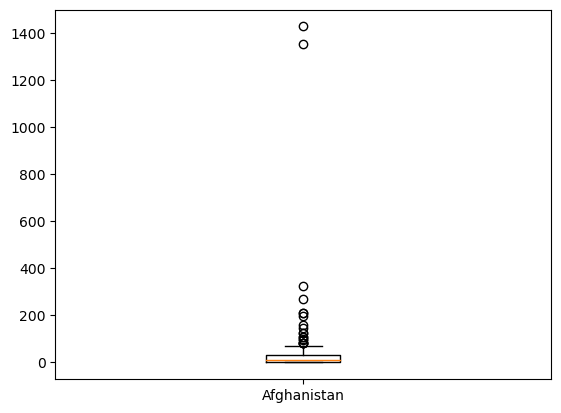

In [111]:
# Détection d'outliers

plt.boxplot(data['population 2018 (en M)'])
plt.xticks(ticks=[1], labels=[data['Pays'].values[0]])

plt.show()

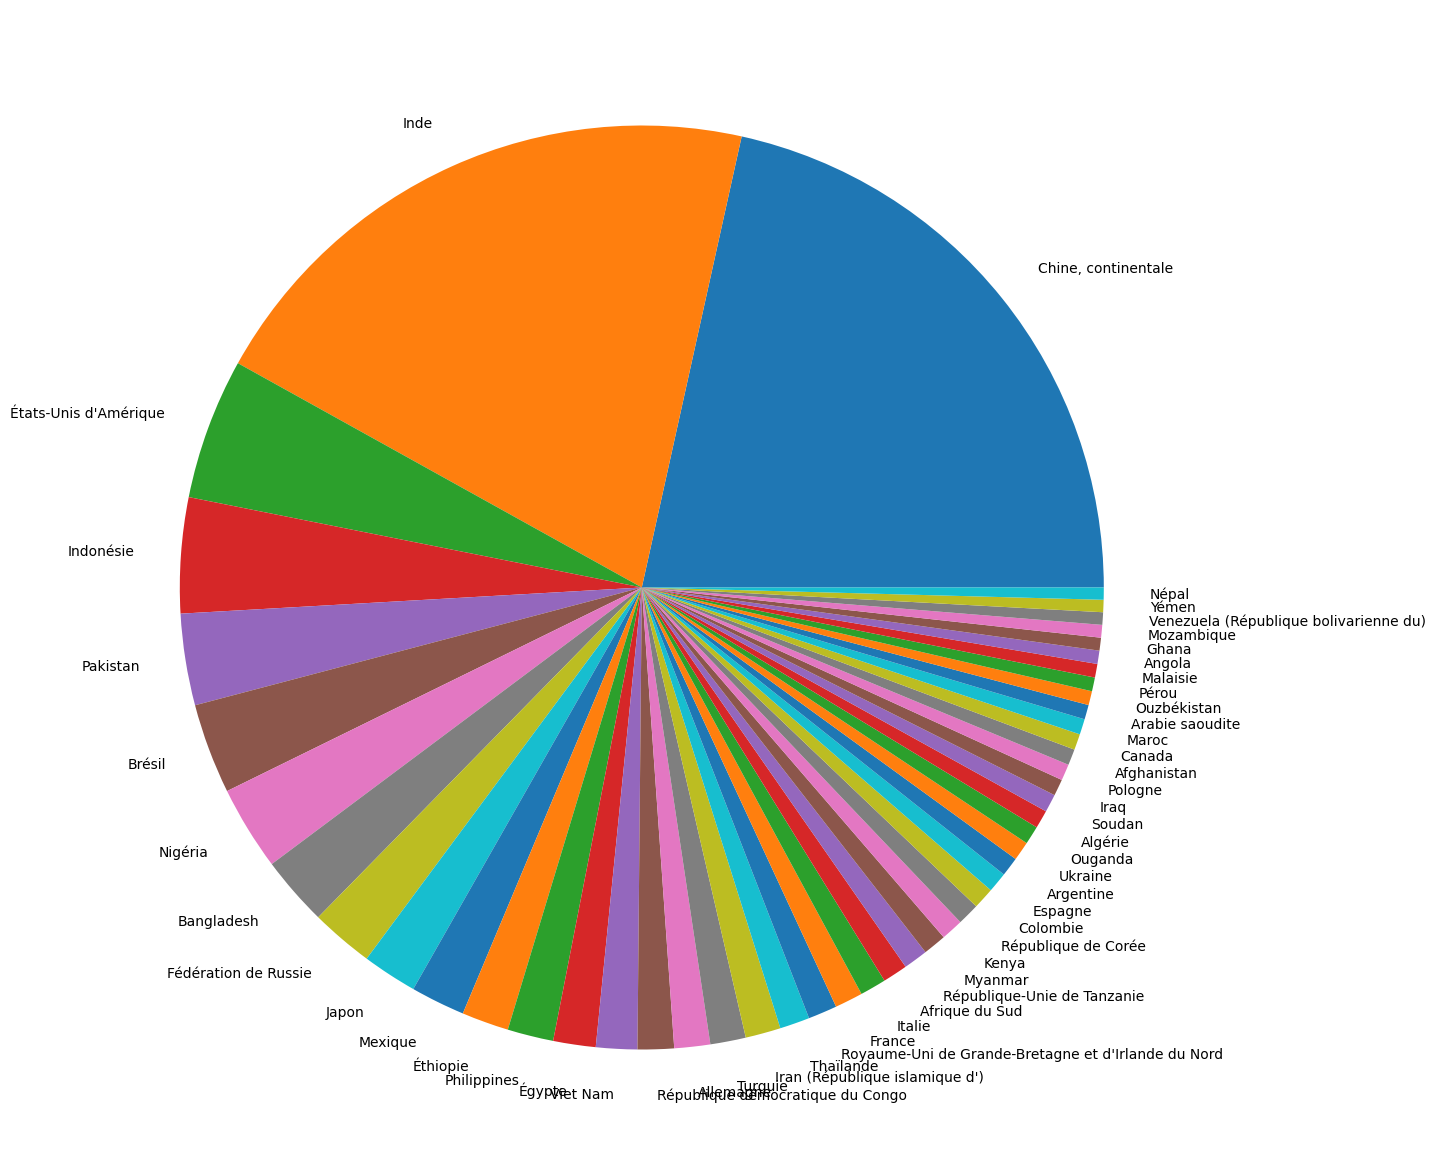

In [112]:
# Diagramme circulaire sur les 50 premières valeurs

data = data.sort_values('population 2018 (en M)', ascending = False)

plt.figure(figsize=(15, 15))

pie = plt.pie(x = data['population 2018 (en M)'].head(50), labels = data['Pays'].head(50))

plt.show()

## 3.2 Importations et production de produits issus de la volaille

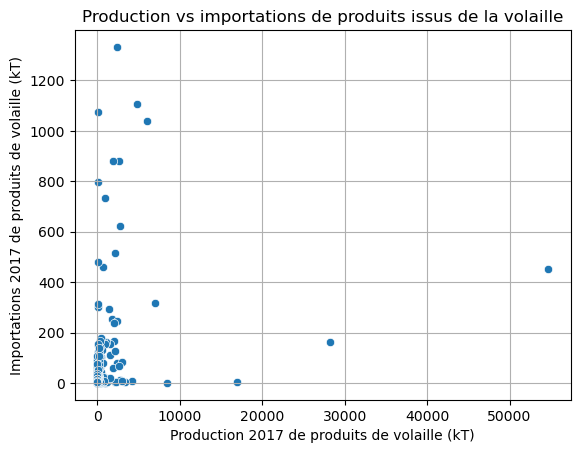

In [113]:
# Diagramme de dispersion

sns.scatterplot(data = data, x = 'Production 2017 de produits de volaille (kT)', y = 'Importations 2017 de produits de volaille (kT)')

plt.title('Production vs importations de produits issus de la volaille')
plt.grid()

plt.show()

In [114]:
# Vérification des potentiels outliers pour les Importations de produits de volaille (kT)

data[data['Importations 2017 de produits de volaille (kT)'] > 400]

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
43,"Chine, continentale",1427.648,452.0,54694.0,14700.00,1.09,17842.0,-0.26
112,Japon,127.202,1105.0,4816.0,2435.96,1.09,40769.8,1.04
139,Mexique,126.191,1040.0,6021.0,3668.55,1.04,18544.7,-0.85
4,Allemagne,83.124,1333.0,2340.0,1080.00,1.07,52930.8,0.67
185,Royaume-Uni de Grande-Bretagne et d'Irlande du...,67.142,880.0,2580.0,1843.00,0.98,45839.2,0.47
70,France,64.991,623.0,2713.0,1143.00,1.06,45187.4,0.31
1,Afrique du Sud,57.793,516.0,2100.0,1915.00,0.98,13126.0,-0.24
106,Iraq,38.434,798.0,133.0,122.41,0.38,9474.8,-2.53
10,Arabie saoudite,33.703,732.0,899.0,910.00,1.24,45104.3,-0.66
166,Pays-Bas,17.060,880.0,1843.0,869.38,1.16,56761.0,0.85


In [115]:
# Vérification des potentiels outliers pour la production de produits de volaille (kT)

data[data['Production 2017 de produits de volaille (kT)'] > 5000]

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
43,"Chine, continentale",1427.648,452.0,54694.0,14700.00,1.09,17842.0,-0.26
103,Inde,1352.642,0.0,8395.0,3670.16,1.03,6675.3,-0.86
65,États-Unis d'Amérique,327.096,161.0,28237.0,20652.97,1.02,63069.2,-0.02
31,Brésil,209.469,4.0,16923.0,14636.48,1.02,14615.0,-0.42
67,Fédération de Russie,145.734,318.0,6963.0,4617.34,0.99,27969.7,-0.73
139,Mexique,126.191,1040.0,6021.0,3668.55,1.04,18544.7,-0.85


Aucun véritable outliers à signaler

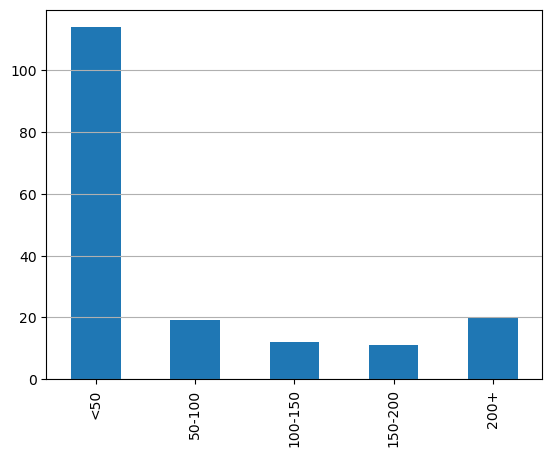

In [116]:
# Répartition des pays importateurs en 10 tranches

data = data.sort_values('Importations 2017 de produits de volaille (kT)', ascending = False)

importateurs = pd.DataFrame()

importateurs['Pays'] = data['Pays']

conditions = [
    (data['Importations 2017 de produits de volaille (kT)'] <= 50),
    (data['Importations 2017 de produits de volaille (kT)'] > 50) & (data['Importations 2017 de produits de volaille (kT)'] <= 100),
    (data['Importations 2017 de produits de volaille (kT)'] > 100) & (data['Importations 2017 de produits de volaille (kT)'] <= 150),
    (data['Importations 2017 de produits de volaille (kT)'] > 150) & (data['Importations 2017 de produits de volaille (kT)'] <= 200),
    (data['Importations 2017 de produits de volaille (kT)'] > 200)
]

valeurs = ['<50', '50-100', '100-150', '150-200', '200+']

importateurs["importations 2017 (kT)"] = pd.Categorical(np.select(conditions, valeurs), categories=valeurs, ordered=True)

importateurs["importations 2017 (kT)"].value_counts().sort_index().plot(kind='bar')
plt.grid(axis = 'y')

plt.show()

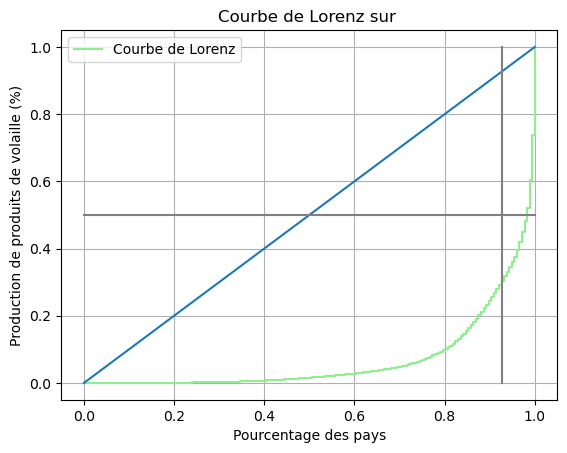

In [117]:
# Courbe de Lorenz sur la production de produits de volaille

prodLorenz = data.sort_values('Production 2017 de produits de volaille (kT)')
prodLorenz['prod_cumulée'] = prodLorenz['Production 2017 de produits de volaille (kT)'].cumsum()
prodLorenz['% prod cumulée'] = prodLorenz['prod_cumulée'] / prodLorenz['Production 2017 de produits de volaille (kT)'].sum()
prodLorenz['% pays cumulé'] = (np.arange(prodLorenz.shape[0]) + 1) / prodLorenz.shape[0]

médiale = 0.928
x = [0, 1]
y = [0, 1]


plt.plot(prodLorenz['% pays cumulé'], prodLorenz['% prod cumulée'], drawstyle = 'steps-post', label = "Courbe de Lorenz", color = 'lightgreen')
plt.plot(x, y)
plt.plot(x, [0.5, 0.5], color = 'grey')
plt.plot([médiale, médiale], y, color = 'grey')
plt.title('Courbe de Lorenz sur ')
plt.xlabel('Pourcentage des pays')
plt.ylabel('Production de produits de volaille (%)')
plt.grid()
plt.legend()

plt.show()

# 3.3 Production 2021 de viande de poulet (kT)

In [118]:
data = data.sort_values('Production 2021 de viande de poulet (kT)', ascending = False)

data.head(10)

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
65,États-Unis d'Amérique,327.096,161.0,28237.0,20652.97,1.02,63069.2,-0.02
43,"Chine, continentale",1427.648,452.0,54694.0,14700.00,1.09,17842.0,-0.26
31,Brésil,209.469,4.0,16923.0,14636.48,1.02,14615.0,-0.42
67,Fédération de Russie,145.734,318.0,6963.0,4617.34,0.99,27969.7,-0.73
104,Indonésie,267.671,8.0,4197.0,3844.35,1.27,11746.2,-0.50
103,Inde,1352.642,0.0,8395.0,3670.16,1.03,6675.3,-0.86
139,Mexique,126.191,1040.0,6021.0,3668.55,1.04,18544.7,-0.85
112,Japon,127.202,1105.0,4816.0,2435.96,1.09,40769.8,1.04
11,Argentine,44.361,8.0,2974.0,2294.10,1.04,21506.9,0.04
226,Turquie,82.340,5.0,3397.0,2245.77,1.02,31252.1,-1.19


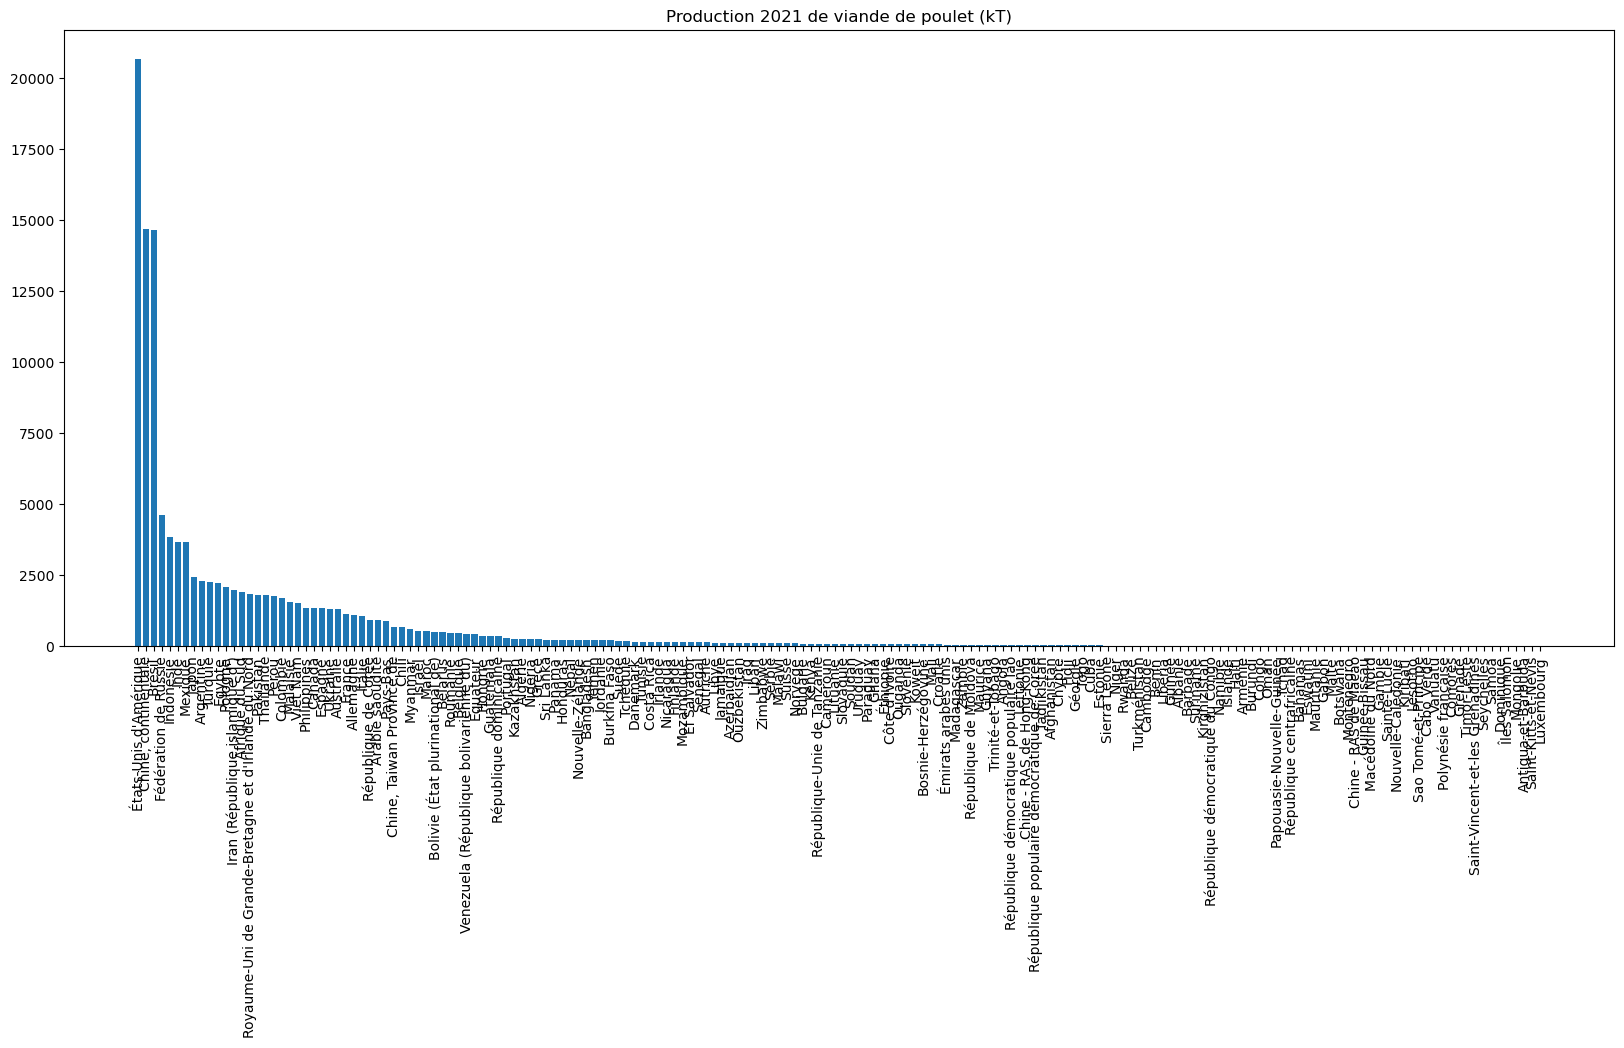

In [119]:
plt.figure(figsize=(20, 8))

plt.bar(data['Pays'], data['Production 2021 de viande de poulet (kT)'])
plt.xticks(rotation='vertical')
plt.title('Production 2021 de viande de poulet (kT)')

plt.show()

## 3.4 Evolution 2018-2020 de la consommation de produits de volaille (%)

In [120]:
data.sort_values('Evolution 2018-2020 de la consommation de produits de volaille (%)', ascending = False).head(10)

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
34,Burkina Faso,19.751,0.00,104.00,204.22,2.48,2241.0,-1.55
47,Comores,0.832,7.91,0.98,0.57,1.80,2989.6,-0.29
229,Uruguay,3.449,3.00,82.00,77.18,1.65,22415.4,1.05
117,Kiribati,0.116,1.00,1.00,0.98,1.53,1606.0,1.08
199,Sao Tomé-et-Principe,0.211,2.00,1.00,0.75,1.41,4046.9,0.48
232,Viet Nam,95.546,295.00,1450.00,1520.26,1.39,10516.2,-0.07
159,Ouzbékistan,32.476,136.88,212.28,123.60,1.36,7734.8,-0.44
50,Côte d'Ivoire,25.069,9.00,115.00,70.08,1.34,5406.7,-0.98
22,Belgique,11.482,458.00,633.00,447.71,1.33,51601.9,0.59
41,Chine - RAS de Hong-Kong,7.372,1074.00,24.00,32.97,1.28,60051.8,0.09


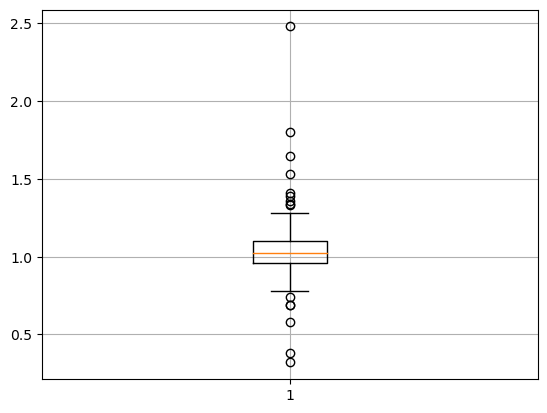

In [121]:
plt.boxplot(data['Evolution 2018-2020 de la consommation de produits de volaille (%)'])
plt.grid()

plt.show()

# 3.5 PIB 2021 par habitant (en dollars)

In [122]:
data.sort_values('PIB 2021/hbt ($)', ascending = False).head(10)

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
126,Luxembourg,0.604,19.0,2.0,0.00,0.97,118680.0,1.23
107,Irlande,4.819,107.0,164.0,147.77,1.04,102154.0,0.98
213,Suisse,8.526,87.0,149.0,107.20,1.00,70792.7,1.19
42,Chine - RAS de Macao,0.632,36.0,3.0,3.28,1.15,67178.7,1.15
154,Norvège,5.338,3.0,171.0,106.04,0.99,65688.6,1.25
65,États-Unis d'Amérique,327.096,161.0,28237.0,20652.97,1.02,63069.2,-0.02
41,Chine - RAS de Hong-Kong,7.372,1074.0,24.0,32.97,1.28,60051.8,0.09
44,"Chine, Taiwan Province de",23.726,163.0,1053.0,684.42,1.16,59400.0,0.77
54,Danemark,5.752,168.0,265.0,163.10,0.93,58187.0,0.94
166,Pays-Bas,17.060,880.0,1843.0,869.38,1.16,56761.0,0.85


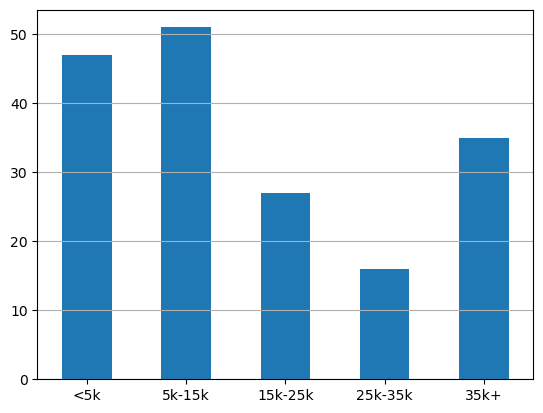

In [123]:
pib_par_hbt = pd.DataFrame()

data = data.sort_values('PIB 2021/hbt ($)', ascending = False)

pib_par_hbt['Pays'] = data['Pays']

conditions = [
    (data['PIB 2021/hbt ($)'] <= 5000),
    (data['PIB 2021/hbt ($)'] > 5000) & (data['PIB 2021/hbt ($)'] <= 15000),
    (data['PIB 2021/hbt ($)'] > 15000) & (data['PIB 2021/hbt ($)'] <= 25000),
    (data['PIB 2021/hbt ($)'] > 25000) & (data['PIB 2021/hbt ($)'] <= 35000),
    (data['PIB 2021/hbt ($)'] > 35000)
]

valeurs = ['<5k', '5k-15k', '15k-25k', '25k-35k', '35k+']

pib_par_hbt['PIB 2021/hbt ($)'] = pd.Categorical(np.select(conditions, valeurs), categories=valeurs, ordered=True)

pib_par_hbt['PIB 2021/hbt ($)'].value_counts().sort_index().plot(kind='bar')
plt.grid(axis = 'y')
plt.xticks(rotation= 0)

plt.show()

# 3.6 Stabilité politique

In [124]:
data.sort_values('Stabilité politique 2020', ascending = True).head(10)

,Pays,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
0,Afghanistan,37.172,83.00,48.0,28.03,0.94,369.0,-2.73
233,Yémen,28.499,78.00,234.0,205.94,1.08,702.0,-2.67
106,Iraq,38.434,798.00,133.0,122.41,0.38,9474.8,-2.53
123,Libye,6.679,26.61,219.1,127.57,0.89,21260.4,-2.48
175,République centrafricaine,4.666,5.00,10.0,6.60,0.93,928.9,-2.18
132,Mali,19.078,2.00,71.0,60.45,1.03,2227.7,-2.15
152,Nigéria,195.875,2.00,711.0,241.19,0.91,4969.2,-1.86
160,Pakistan,212.228,4.00,2096.0,1809.00,1.17,5350.1,-1.85
209,Soudan,41.802,3.00,123.0,79.79,1.12,3838.7,-1.76
66,Éthiopie,109.224,1.00,69.0,70.08,0.88,2366.4,-1.74


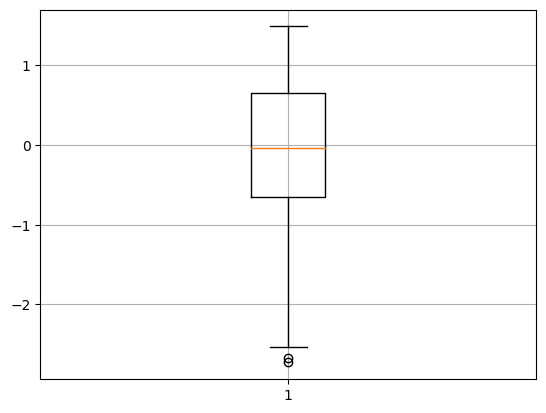

In [125]:
# Création d'un boxplot

plt.boxplot(data['Stabilité politique 2020'])
plt.grid()

plt.show()

***

***

# 4. ACP

In [126]:
data = data.set_index('Pays', drop=True)

data

,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
Pays,,,,,,,
Luxembourg,0.604,19.00,2.00,0.00,0.97,118680.0,1.23
Irlande,4.819,107.00,164.00,147.77,1.04,102154.0,0.98
Suisse,8.526,87.00,149.00,107.20,1.00,70792.7,1.19
Chine - RAS de Macao,0.632,36.00,3.00,3.28,1.15,67178.7,1.15
Norvège,5.338,3.00,171.00,106.04,0.99,65688.6,1.25
...,...,...,...,...,...,...,...
République démocratique du Congo,84.068,58.08,18.09,10.53,0.78,1109.4,-1.71
République centrafricaine,4.666,5.00,10.00,6.60,0.93,928.9,-2.18
Burundi,11.175,70.31,14.20,8.27,1.18,722.0,-1.41


In [127]:
# Création de la matrice de données X

X = data.values
X[:5]

array([[6.04000e-01, 1.90000e+01, 2.00000e+00, 0.00000e+00, 9.70000e-01,
        1.18680e+05, 1.23000e+00],
       [4.81900e+00, 1.07000e+02, 1.64000e+02, 1.47770e+02, 1.04000e+00,
        1.02154e+05, 9.80000e-01],
       [8.52600e+00, 8.70000e+01, 1.49000e+02, 1.07200e+02, 1.00000e+00,
        7.07927e+04, 1.19000e+00],
       [6.32000e-01, 3.60000e+01, 3.00000e+00, 3.28000e+00, 1.15000e+00,
        6.71787e+04, 1.15000e+00],
       [5.33800e+00, 3.00000e+00, 1.71000e+02, 1.06040e+02, 9.90000e-01,
        6.56886e+04, 1.25000e+00]])

In [128]:
# Vérification du type

type(X)

numpy.ndarray

In [129]:
# et de la taille

X.shape

(176, 7)

In [130]:
# On enregistre les noms de pays dans la variable names

names = data.index
names

Index(['Luxembourg', 'Irlande', 'Suisse', 'Chine - RAS de Macao', 'Norvège',
       'États-Unis d'Amérique', 'Chine - RAS de Hong-Kong',
       'Chine, Taiwan Province de', 'Danemark', 'Pays-Bas',
       ...
       'Madagascar', 'Tchad', 'Libéria', 'Mozambique', 'Niger',
       'République démocratique du Congo', 'République centrafricaine',
       'Burundi', 'Yémen', 'Afghanistan'],
      dtype='object', name='Pays', length=176)

In [131]:
# On enregistre les noms des colonnes dans la variable features

features = data.columns
features

Index(['population 2018 (en M)',
       'Importations 2017 de produits de volaille (kT)',
       'Production 2017 de produits de volaille (kT)',
       'Production 2021 de viande de poulet (kT)',
       'Evolution 2018-2020 de la consommation de produits de volaille (%)',
       'PIB 2021/hbt ($)', 'Stabilité politique 2020'],
      dtype='object')

In [132]:
# On instancie

scaler = StandardScaler()

In [133]:
# adapte le scaler aux données de X

scaler.fit(X)

StandardScaler()

In [134]:
# Transformation des données

X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.27831414, -0.38751317, -0.2434696 , -0.30301393, -0.38302418,
         4.99150777,  1.45722571],
       [-0.25060722,  0.01294241, -0.21016675, -0.23802122, -0.02768849,
         4.15762346,  1.18471973],
       [-0.2262396 , -0.07807022, -0.21325034, -0.25586486, -0.23073746,
         2.57516576,  1.41362475],
       [-0.27813008, -0.31015243, -0.24326402, -0.30157131,  0.53069615,
         2.39280719,  1.3700238 ],
       [-0.24719562, -0.46032327, -0.20872773, -0.25637505, -0.2814997 ,
         2.31761833,  1.47902619]])

In [135]:
# Vérification des moyennes et écarts-types

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [136]:
# Choix du nombre de composantes principales

n_components = 6

In [137]:
# On instancie l'ACP

pca = PCA(n_components=n_components)

In [138]:
# On l'entraîne sur les données scalées

pca.fit(X_scaled)

PCA(n_components=6)

# 5. Explication de la variance et éboulis des valeurs propres

In [139]:
# Explication de la variance des composantes principales

pca.explained_variance_ratio_

array([0.36781911, 0.23961582, 0.14407227, 0.12450106, 0.06111818,
       0.05131565])

In [140]:
# On enregistre les valeurs dans une variable scree

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([36.78, 23.96, 14.41, 12.45,  6.11,  5.13])

In [141]:
# On calcule la somme cummulée des variances

scree_cum = scree.cumsum().round()
scree_cum

array([37., 61., 75., 88., 94., 99.])

In [142]:
# Création d'une variable avec la liste des composantes

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

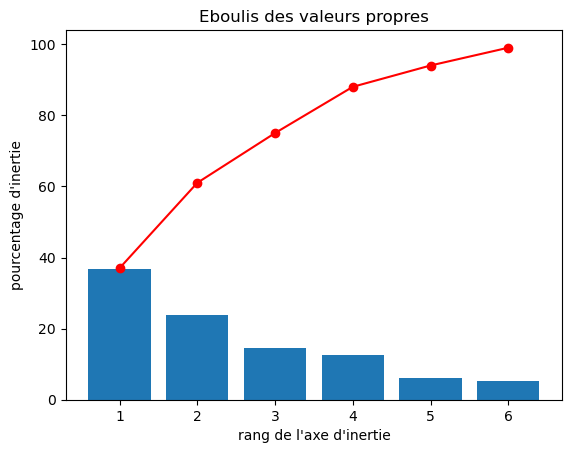

In [143]:
# Création du graphique de l'éboulis des valeurs propres

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

# 6. Détail des composantes principales

In [144]:
# Composition des composantes principales selon le poids des variables initiales

pcs = pca.components_
pcs

array([[ 0.52310379,  0.2007554 ,  0.60015211,  0.56075364,  0.00956242,
         0.09868404, -0.04003143],
       [-0.15782095,  0.35179584, -0.03955017, -0.01182412,  0.06004715,
         0.6758789 ,  0.62386718],
       [ 0.03098605, -0.17897366,  0.02666443,  0.0146642 ,  0.97151543,
        -0.09225693,  0.11716948],
       [-0.07499811,  0.84434656, -0.12212623, -0.12483958,  0.21062487,
        -0.07058233, -0.44900972],
       [ 0.60764538,  0.19511131, -0.0342142 , -0.50161197, -0.06383359,
        -0.37365429,  0.44296866],
       [ 0.47764848, -0.22793226, -0.14066497, -0.35406563,  0.06329585,
         0.61505555, -0.43869126]])

In [145]:
# Mise sous forme de dataframe

pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.523104,0.200755,0.600152,0.560754,0.009562,0.098684,-0.040031
1,-0.157821,0.351796,-0.039550,-0.011824,0.060047,0.675879,0.623867
2,0.030986,-0.178974,0.026664,0.014664,0.971515,-0.092257,0.117169
3,-0.074998,0.844347,-0.122126,-0.124840,0.210625,-0.070582,-0.449010
4,0.607645,0.195111,-0.034214,-0.501612,-0.063834,-0.373654,0.442969
5,0.477648,-0.227932,-0.140665,-0.354066,0.063296,0.615056,-0.438691


In [146]:
# On ajoute les noms des colonnes

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,population 2018 (en M),Importations 2017 de produits de volaille (kT),Production 2017 de produits de volaille (kT),Production 2021 de viande de poulet (kT),Evolution 2018-2020 de la consommation de produits de volaille (%),PIB 2021/hbt ($),Stabilité politique 2020
F1,0.52,0.20,0.60,0.56,0.01,0.10,-0.04
F2,-0.16,0.35,-0.04,-0.01,0.06,0.68,0.62
F3,0.03,-0.18,0.03,0.01,0.97,-0.09,0.12
F4,-0.07,0.84,-0.12,-0.12,0.21,-0.07,-0.45
F5,0.61,0.20,-0.03,-0.50,-0.06,-0.37,0.44
F6,0.48,-0.23,-0.14,-0.35,0.06,0.62,-0.44


In [147]:
# On transpose notre matrice des composantes principales

pcs.T

,F1,F2,F3,F4,F5,F6
population 2018 (en M),0.523104,-0.157821,0.030986,-0.074998,0.607645,0.477648
Importations 2017 de produits de volaille (kT),0.200755,0.351796,-0.178974,0.844347,0.195111,-0.227932
Production 2017 de produits de volaille (kT),0.600152,-0.039550,0.026664,-0.122126,-0.034214,-0.140665
Production 2021 de viande de poulet (kT),0.560754,-0.011824,0.014664,-0.124840,-0.501612,-0.354066
Evolution 2018-2020 de la consommation de produits de volaille (%),0.009562,0.060047,0.971515,0.210625,-0.063834,0.063296
PIB 2021/hbt ($),0.098684,0.675879,-0.092257,-0.070582,-0.373654,0.615056
Stabilité politique 2020,-0.040031,0.623867,0.117169,-0.449010,0.442969,-0.438691


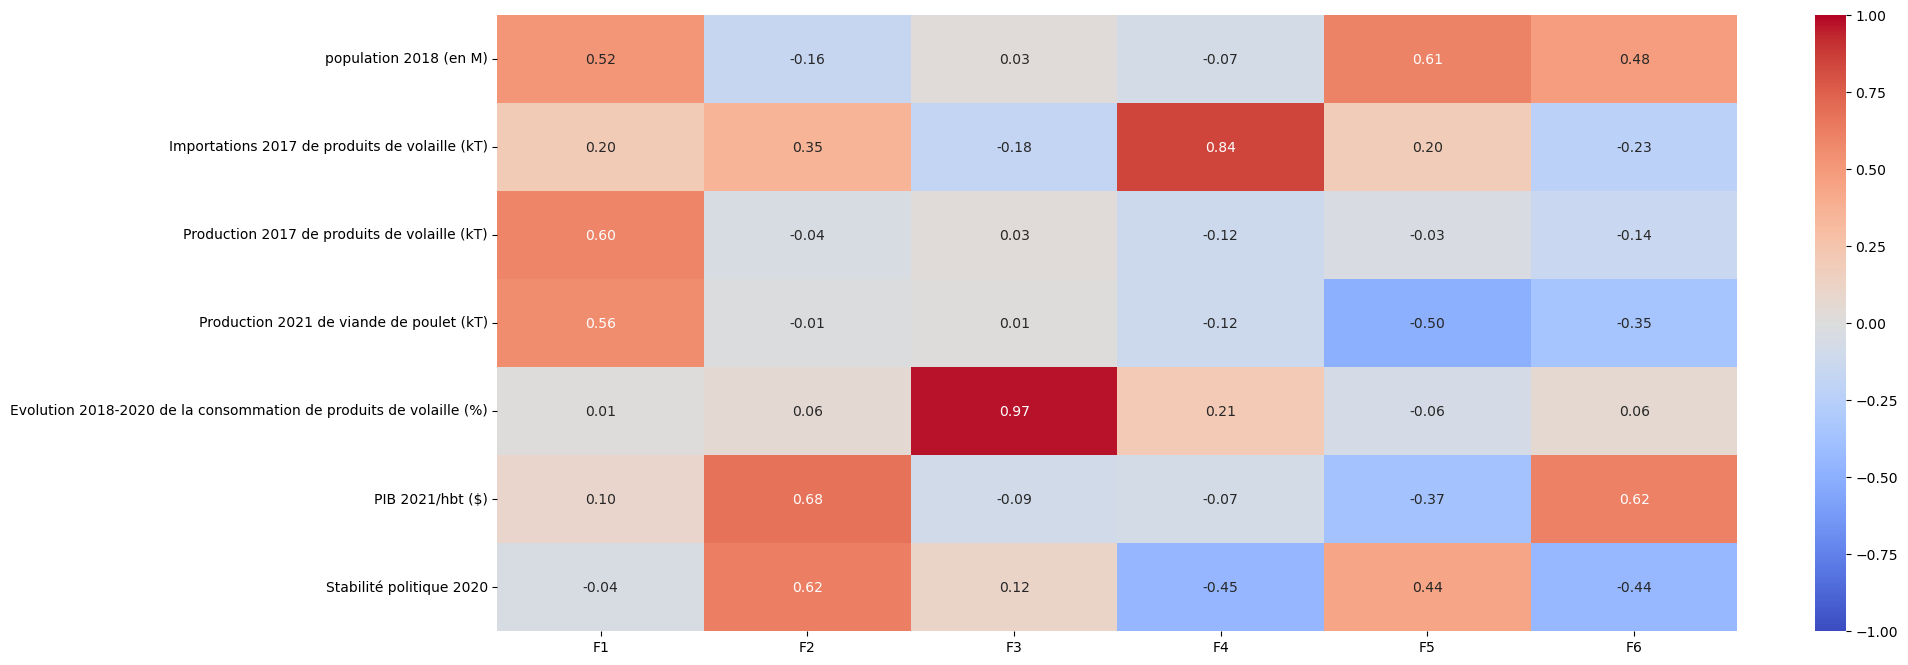

In [148]:
# Visualisation via une heatmap

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

plt.show()

# 7. Cercle des corrélations

In [149]:
# Définition des axes x et y pour les 2 premières composantes

x, y = 0,1

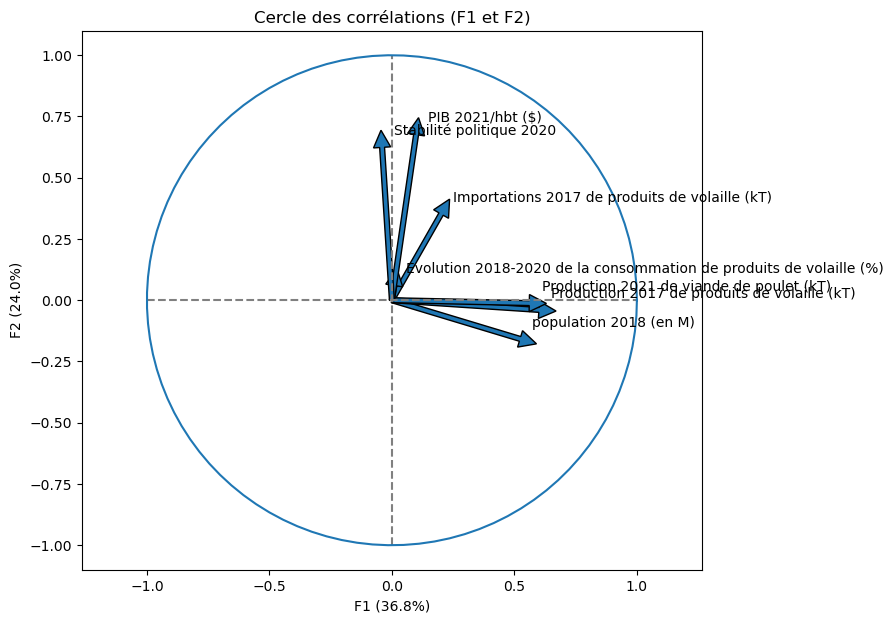

In [150]:
# Graphique du cercle des corrélations pour les 2 premières composantes

fig, ax = plt.subplots(figsize=(8, 7))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [151]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphe
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

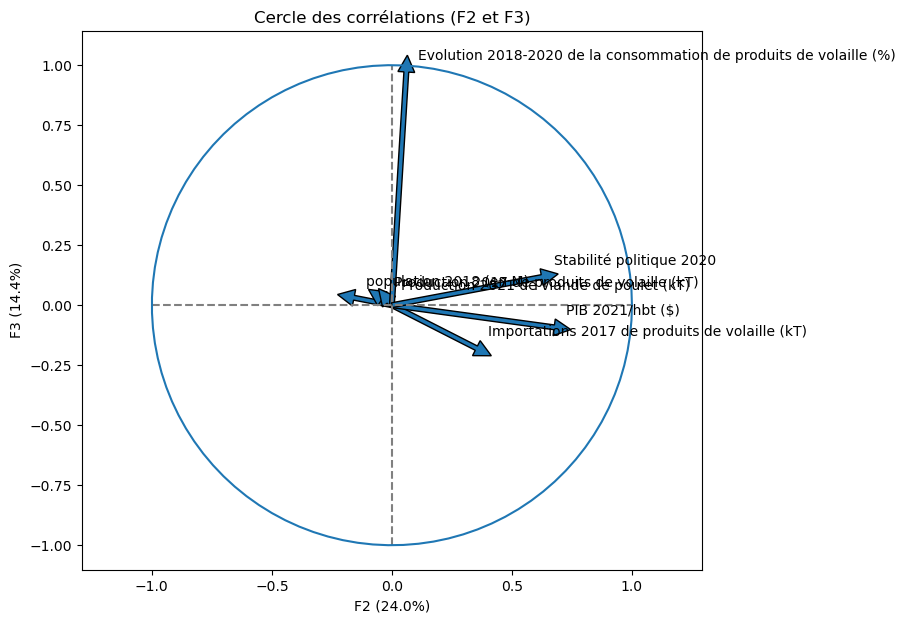

In [152]:
# Cercle des corrélations pour F2 et F3

correlation_graph(pca, (1,2), features)

***

# 8. Projection des individus

In [153]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
    
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


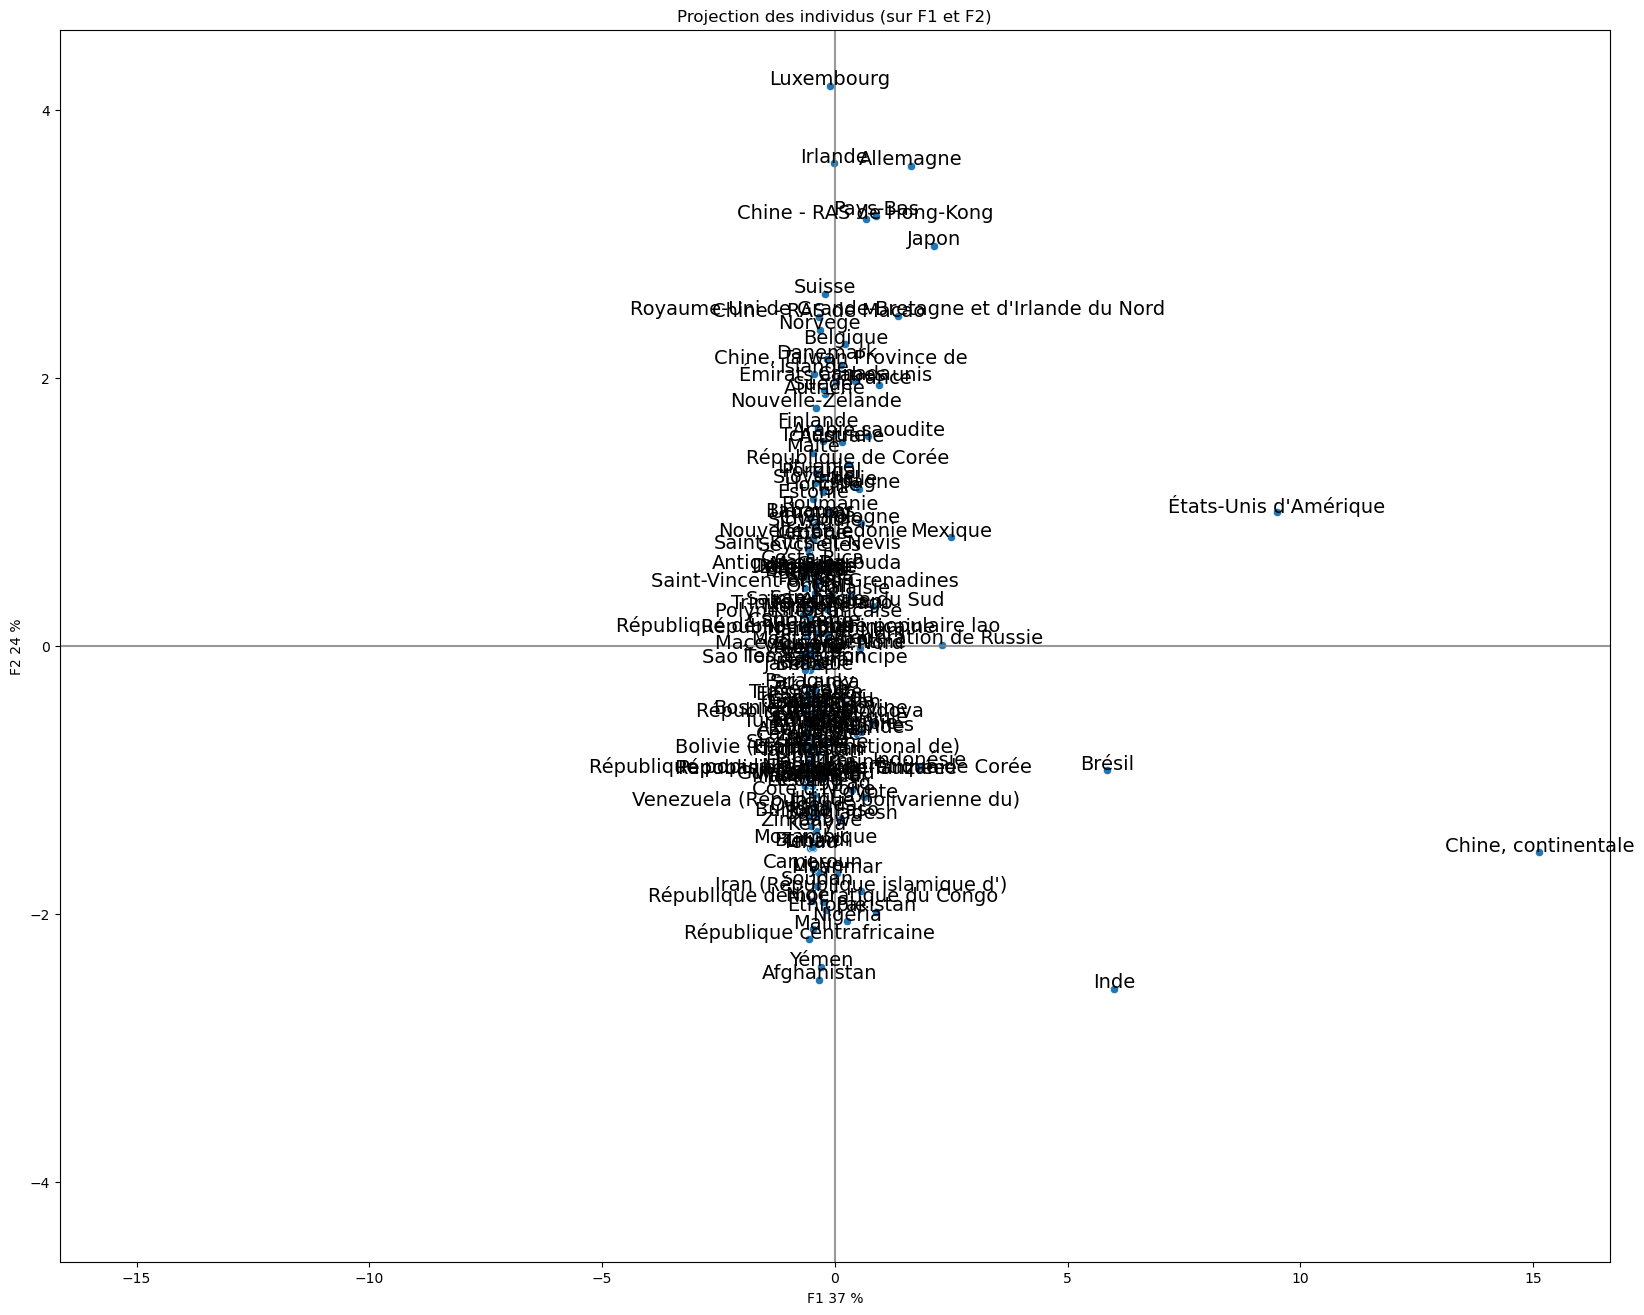

In [154]:
# Projection sur F1 et F2

X_proj = pca.transform(X_scaled)

x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

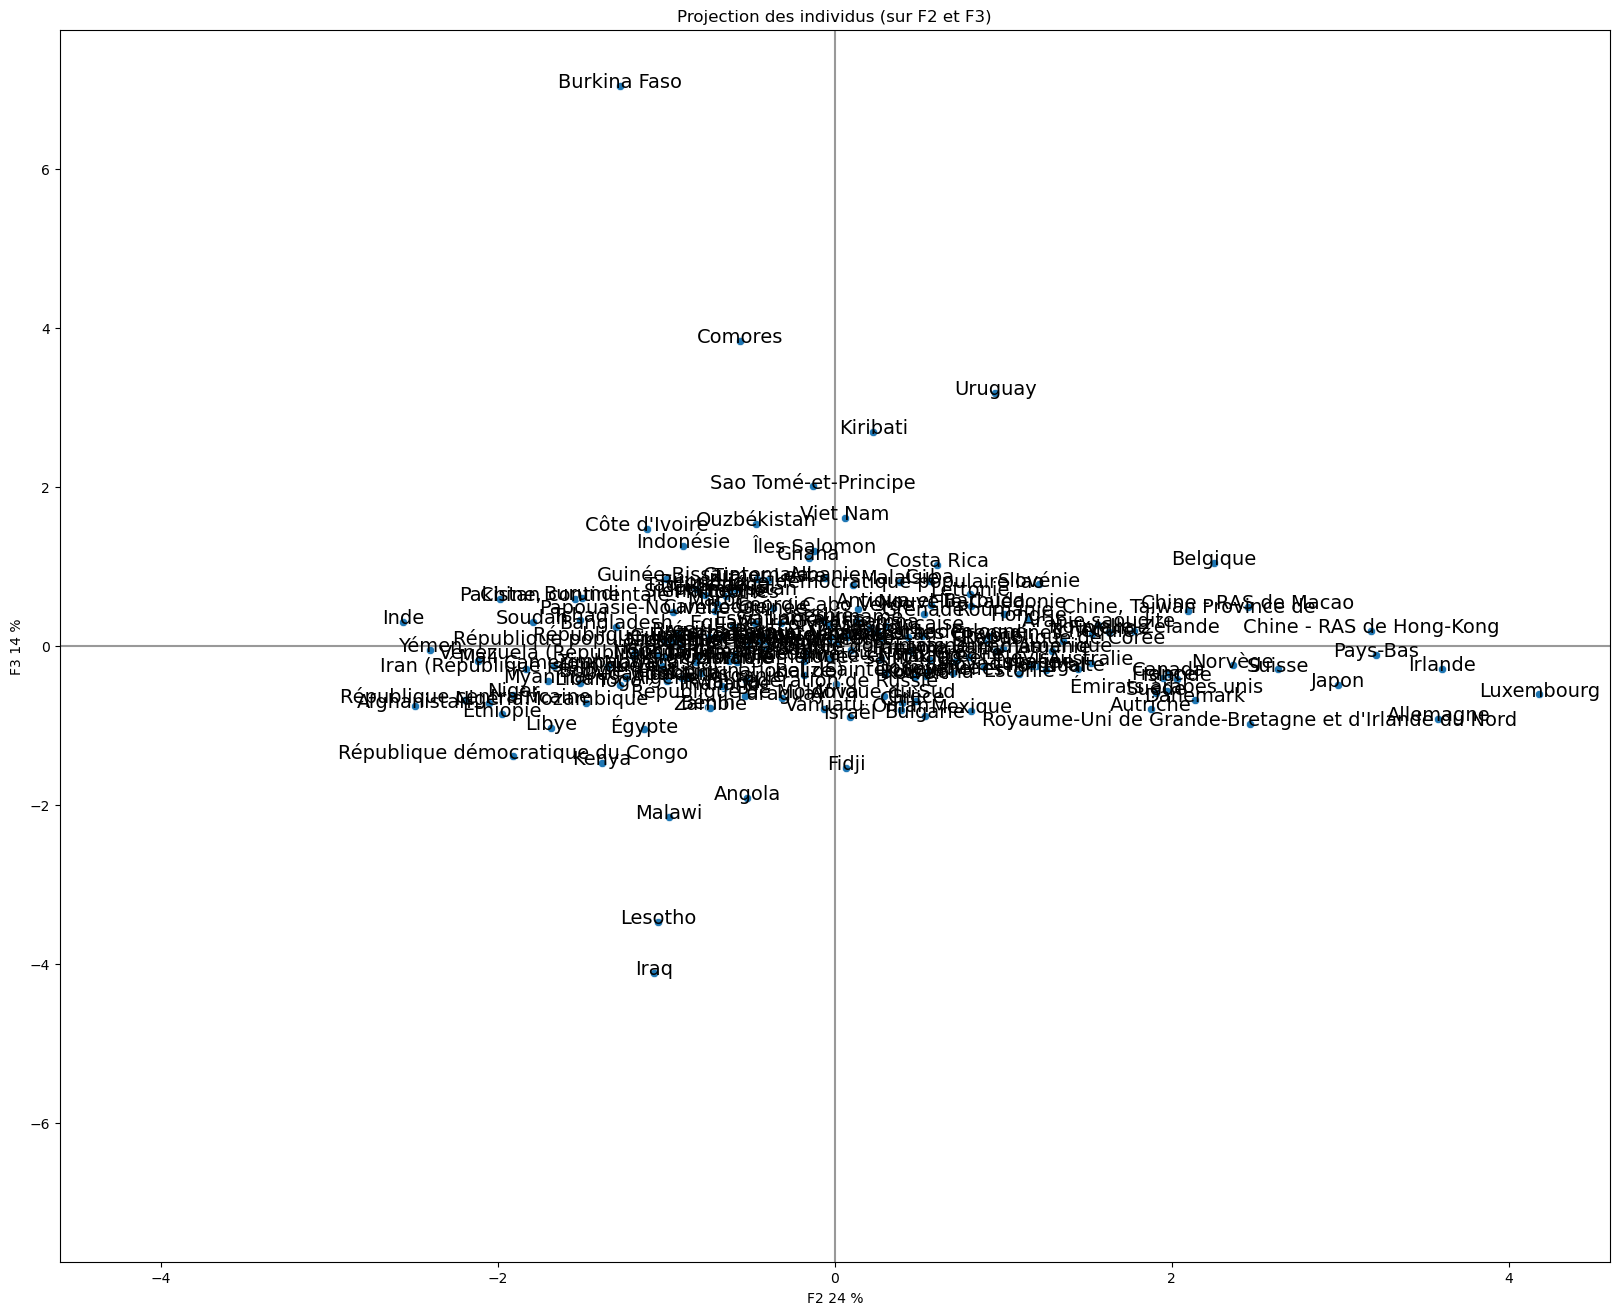

In [165]:
# Projection sur F2 et F3

x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16),marker="o")